In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import random

In [2]:
path = '../input/hexagon/hexagon_real_data/'

In [6]:
parts = [i for i in range(1, 7)]
positions = [i for i in range(1, 10)]

In [ ]:
def temp(t, b0, b1, T_env, T0):
    T = T_env - (b0/b1) + (T0 - T_env + (b0/b1))*np.exp(b1*(t))
    return T

def regression_for_one_layer(profile):
    reg = LinearRegression()
    T_env = 24

    X = [i - T_env for i in profile]
    X = X[:len(profile) - 1]
    Y = [profile[i + 1] - profile[i] for i in range(len(profile) - 1)]
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)
    reg.fit(X, Y)
    b0 = reg.intercept_[0]
    b1 = reg.coef_[0][0]

    regression_profile = []
    for i in range(200):
        t = temp(i, b0, b1, T_env, profile[0])
        regression_profile.append(t)
    # plt.plot(regression_profile)
    # plt.plot(profile)
    # plt.show()
    return b0, b1, profile[0], regression_profile

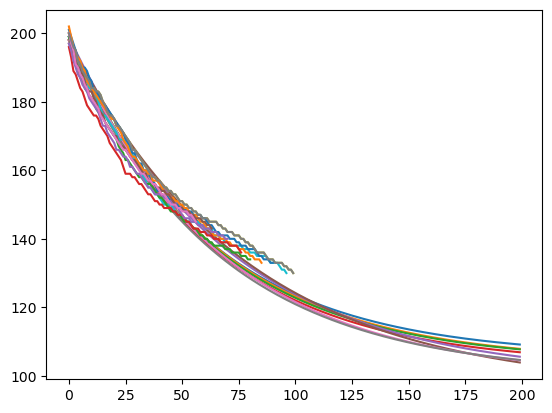

<Figure size 640x480 with 0 Axes>

In [4]:
for part in [5,4]:  
    for position in positions:
        df = pd.read_csv(f'{path}part{part}_pos{position}.csv')
        df_filtered = df[[df.columns[0], df.columns[-1]]].to_numpy()
        df_filtered[:, 0] = df_filtered[:, 0] - df_filtered[0, 0]
        x = df_filtered[:,0]
        y = df_filtered[:,1]
        plt.plot(x,y,label=f'part{part}-pos{position}')
# plt.legend()
plt.show()
plt.clf()

In [ ]:
df = pd.read_csv(f'{path}part{5}_pos{8}.csv')
df_filtered = df[[df.columns[0], df.columns[-1]]].to_numpy()
df_filtered[:, 0] = df_filtered[:, 0] - df_filtered[0, 0]
df_filtered_df = pd.DataFrame(df_filtered, columns=['Column1', 'Column2'])
df_filtered_df['Column2'] = df_filtered_df['Column2'].interpolate(method='linear')
df_filtered = df_filtered_df.to_numpy()
x = df_filtered[:,0]
y = df_filtered[:,1]
plt.plot(y)

In [ ]:
profile = regression_for_one_layer(y)
plt.plot(profile)
plt.plot(y)
df = pd.DataFrame({
    'frame': range(len(profile)), 
    'Function 2 [C]': profile           
})
df.to_csv('my_list.csv', index=False)


In [4]:
def temp(t, b0, b1, T_env, T0):
    T = T_env - (b0/b1) + (T0 - T_env + (b0/b1))*np.exp(b1*(t))
    return T

def regression_for_one_layer(profile):
    reg = LinearRegression()
    T_env = 24

    X = [i - T_env for i in profile]
    X = X[:len(profile) - 1]
    Y = [profile[i + 1] - profile[i] for i in range(len(profile) - 1)]
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)
    reg.fit(X, Y)
    b0 = reg.intercept_[0]
    b1 = reg.coef_[0][0]

    regression_profile = []
    for i in range(200):
        t = temp(i, b0, b1, T_env, profile[0])
        regression_profile.append(t)
    # plt.plot(regression_profile)
    # plt.plot(profile)
    # plt.show()
    return b0, b1, profile[0], regression_profile


In [3]:
regression_profile = []
regression_params = []

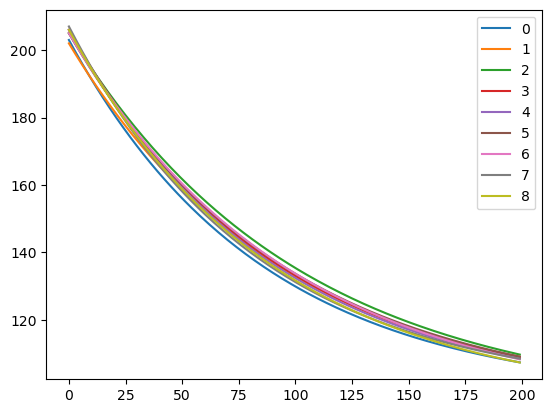

In [7]:
regression_profile_part1 = []
for pos in positions:
    df = pd.read_csv(f'{path}part{1}_pos{pos}.csv')
    df_filtered = df[[df.columns[-1]]].to_numpy()
    squeezed = np.squeeze(df_filtered)
    b0, b1, T0, profile = regression_for_one_layer(squeezed)
    regression_profile_part1.append(profile)
    regression_profile.append(profile)
    regression_params.append((b0, b1, T0))
for i,profile in enumerate(regression_profile_part1):
    plt.plot(profile,label=i)
plt.legend()
plt.show()

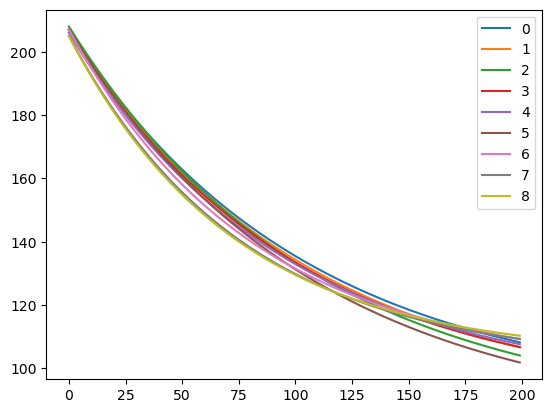

In [8]:
regression_profile_part2 = []
for pos in positions:
    df = pd.read_csv(f'{path}part{2}_pos{pos}.csv')
    df_filtered = df[[df.columns[-1]]].to_numpy()
    squeezed = np.squeeze(df_filtered)
    b0, b1, T0, profile = regression_for_one_layer(squeezed)
    regression_profile_part2.append(profile)
    regression_profile.append(profile)
    regression_params.append((b0, b1, T0))
for i,profile in enumerate(regression_profile_part2):
    plt.plot(profile,label=i)
plt.legend()
plt.show()

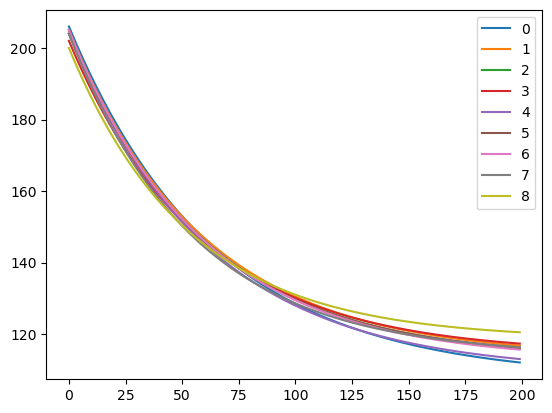

In [9]:
regression_profile_part3 = []
for pos in positions:
    df = pd.read_csv(f'{path}part{3}_pos{pos}.csv')
    df_filtered = df[[df.columns[-1]]].to_numpy()
    squeezed = np.squeeze(df_filtered)
    b0, b1, T0, profile = regression_for_one_layer(squeezed)
    regression_profile_part3.append(profile)
    regression_profile.append(profile)
    regression_params.append((b0, b1, T0))
for i,profile in enumerate(regression_profile_part3):
    plt.plot(profile, label=i)
plt.legend()
plt.show()

In [10]:
len(regression_profile)

27

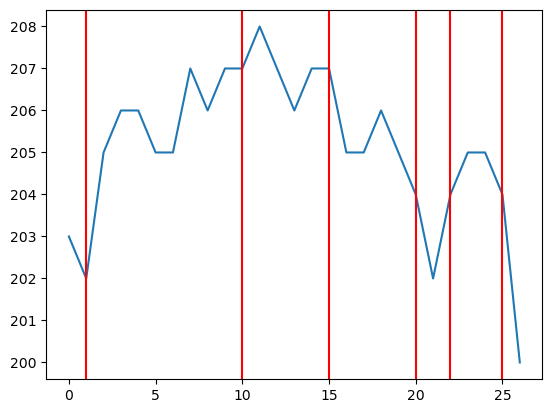

In [48]:
for i in range(1):
    ls = [regression_profile[j][i] for j in range(27)]
    plt.plot(ls)
    plt.axvline(x=1,color='red')
    plt.axvline(x=10,color='red')
    plt.axvline(x=15,color='red')
    plt.axvline(x=20,color='red')
    plt.axvline(x=22,color='red')
    plt.axvline(x=25,color='red')
    plt.savefig('./1016.png')
    plt.show()

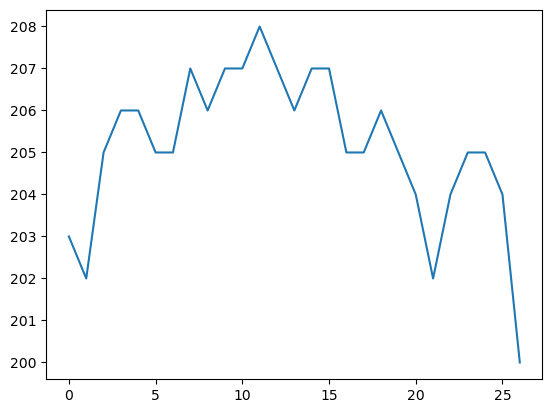

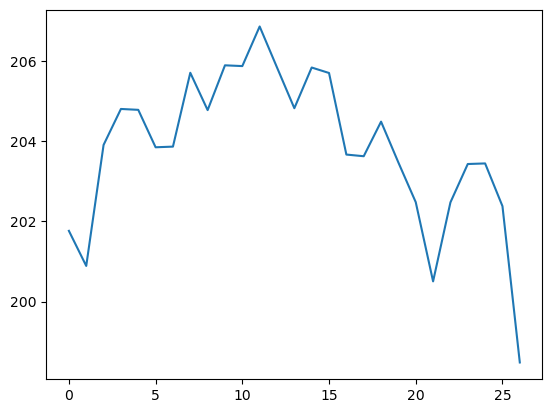

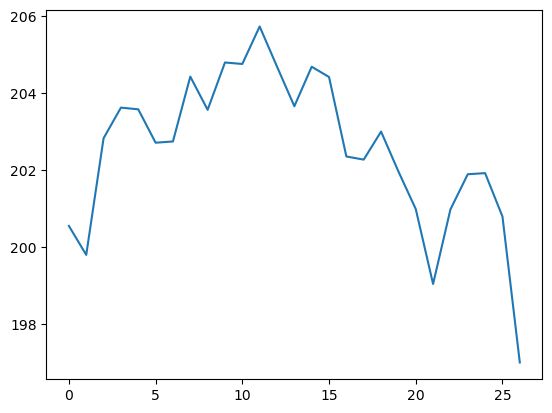

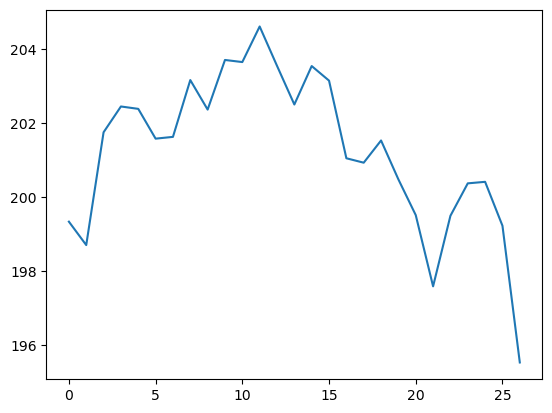

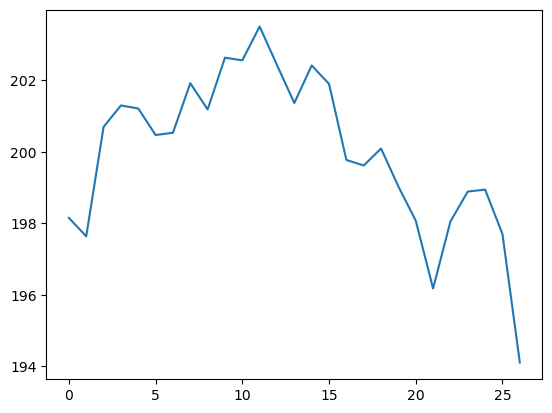

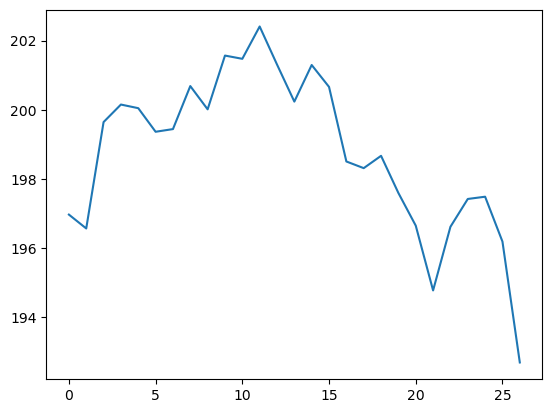

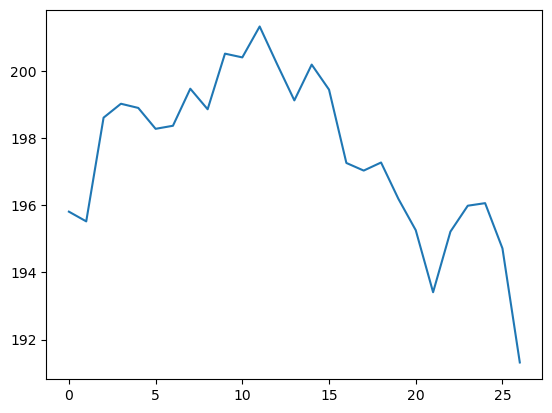

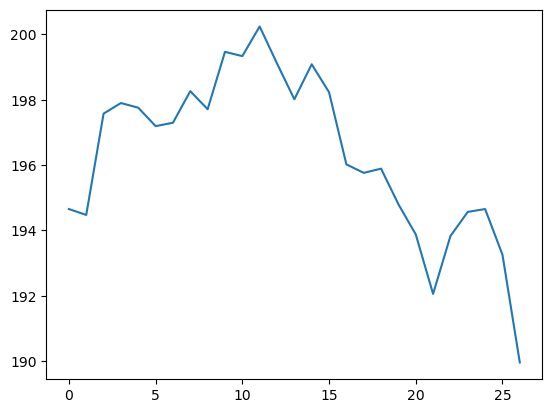

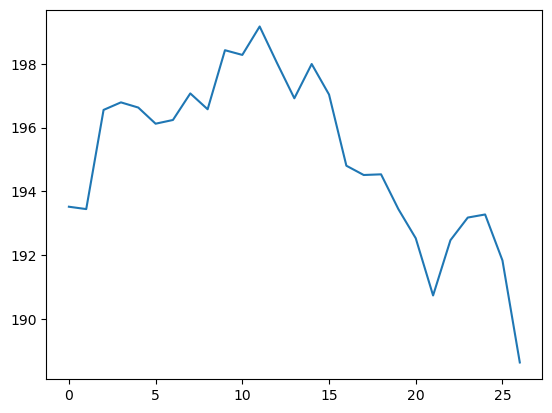

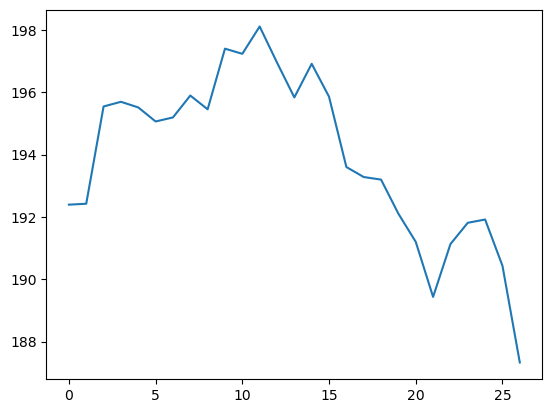

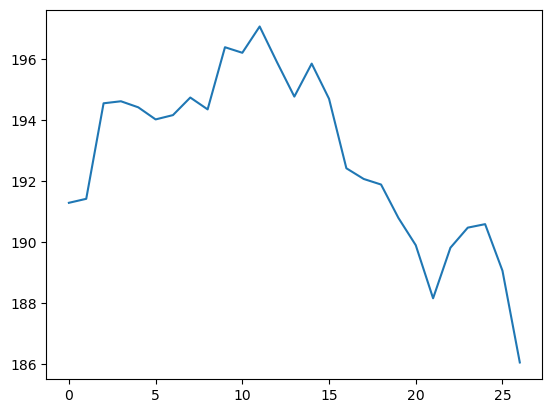

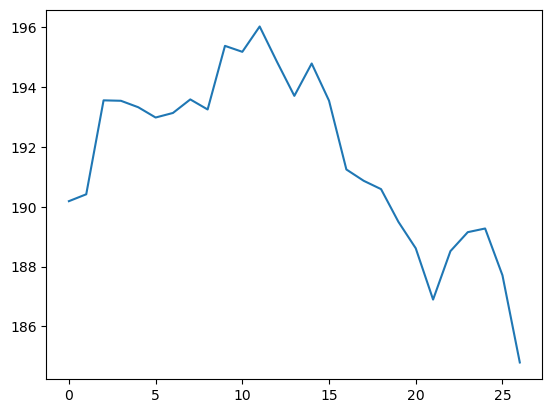

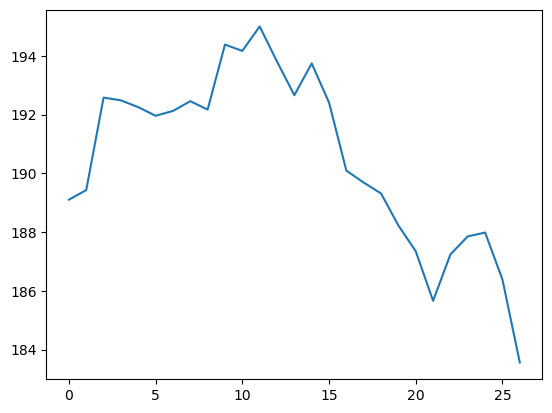

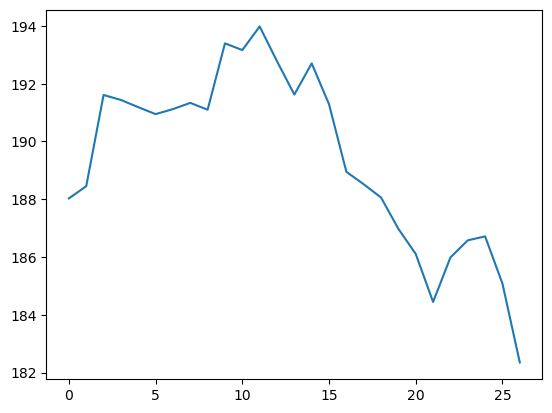

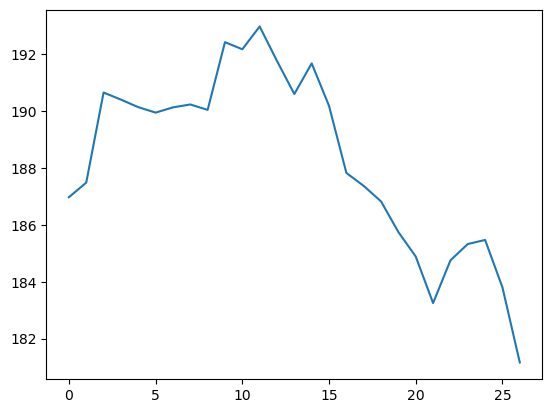

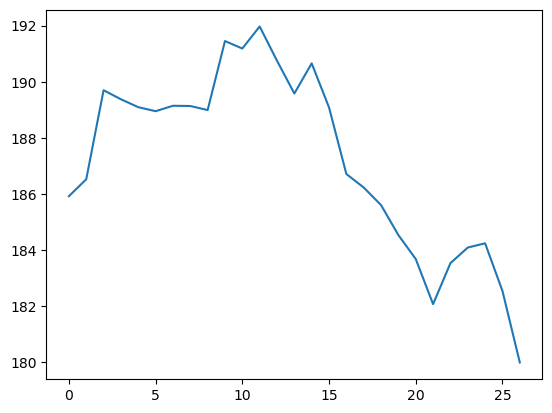

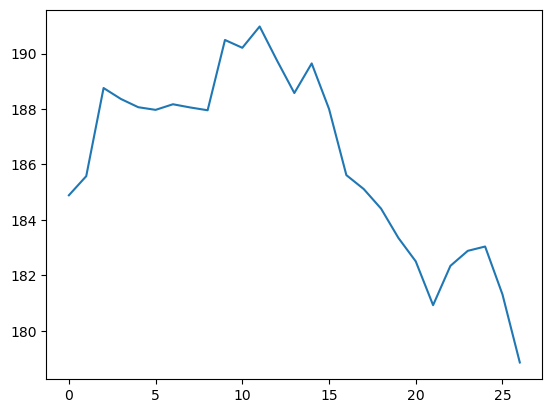

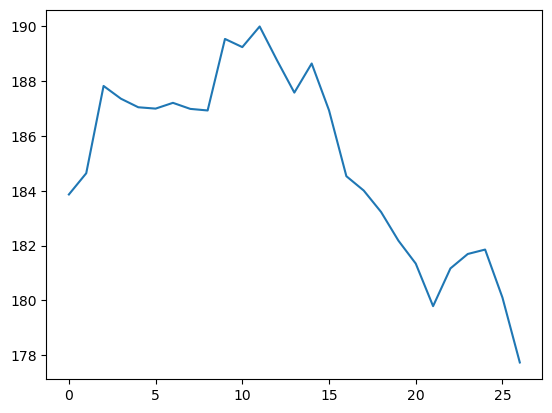

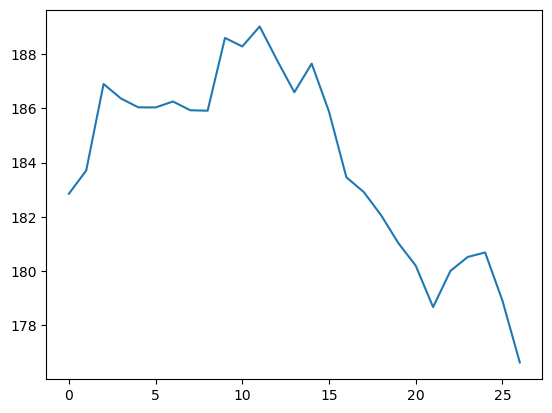

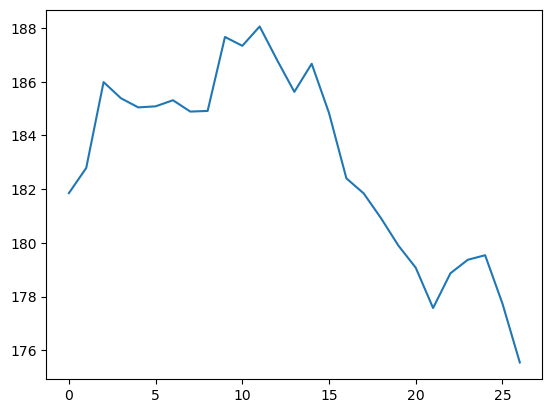

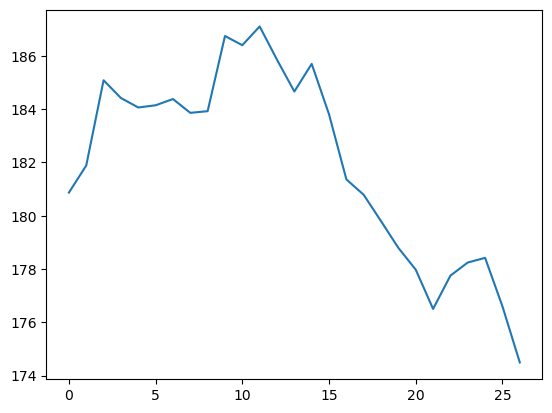

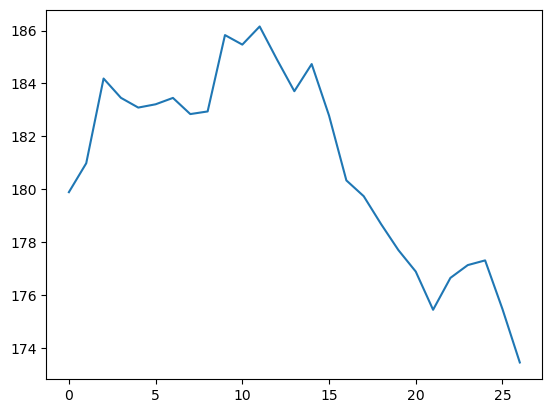

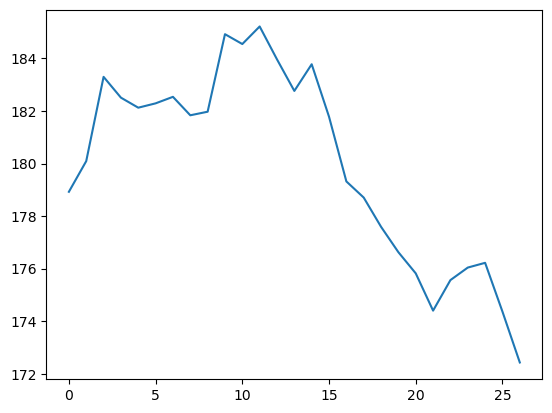

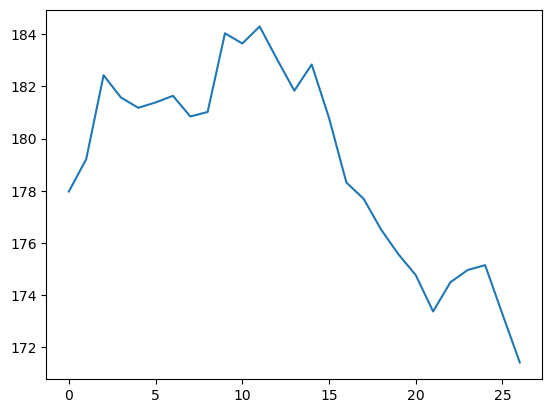

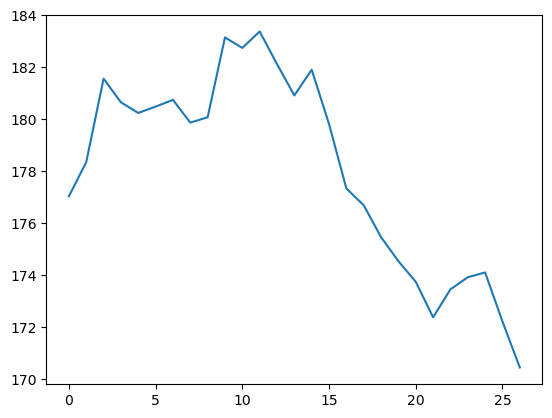

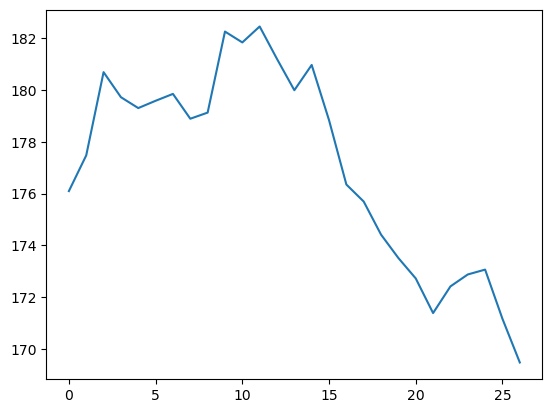

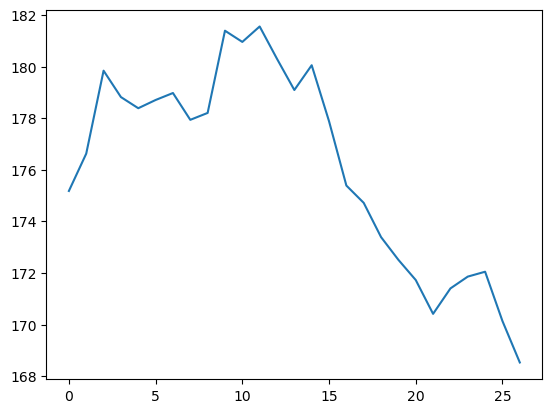

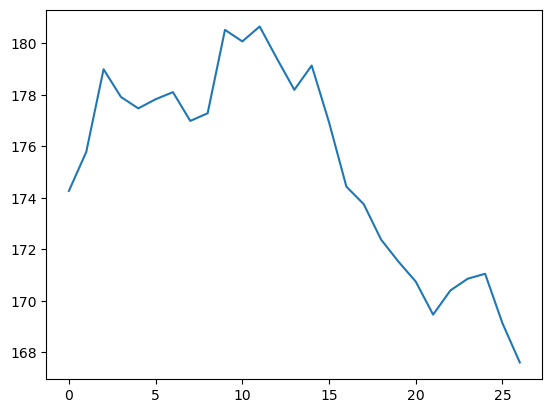

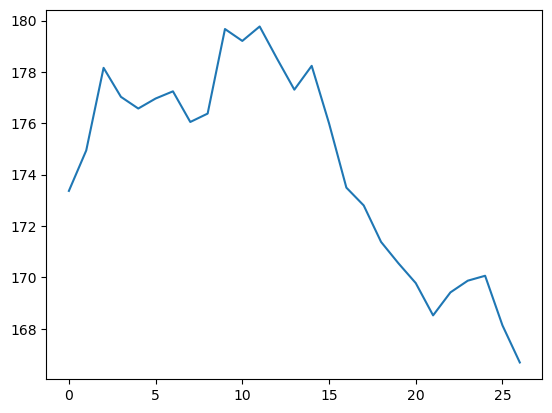

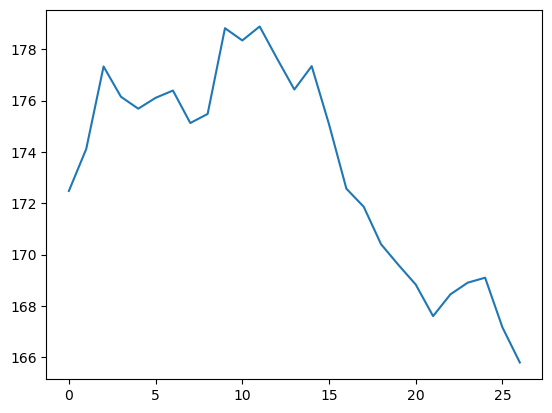

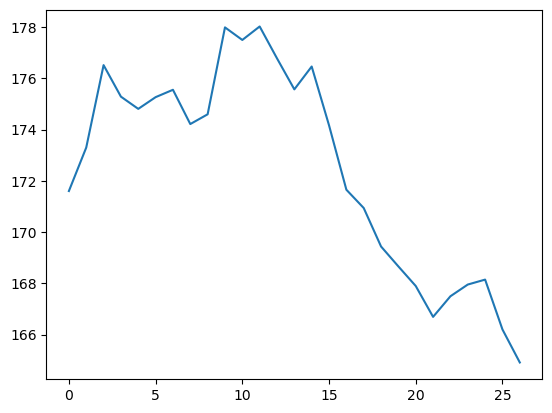

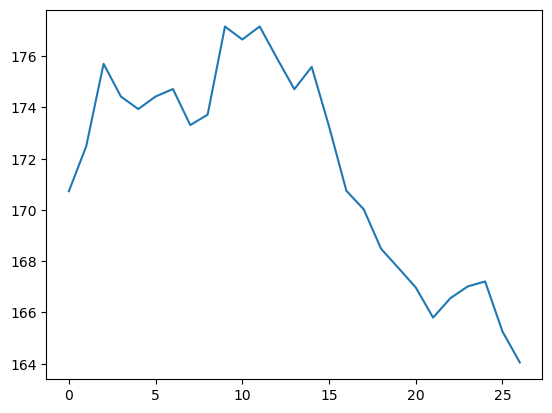

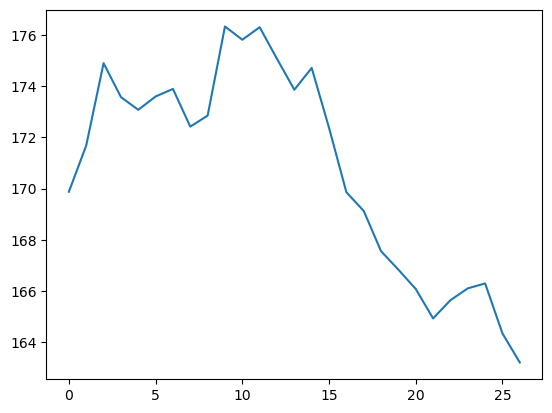

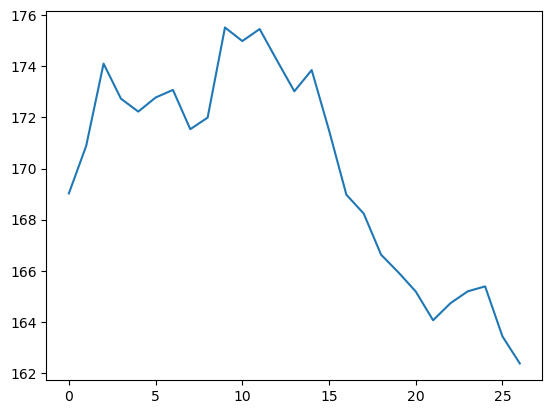

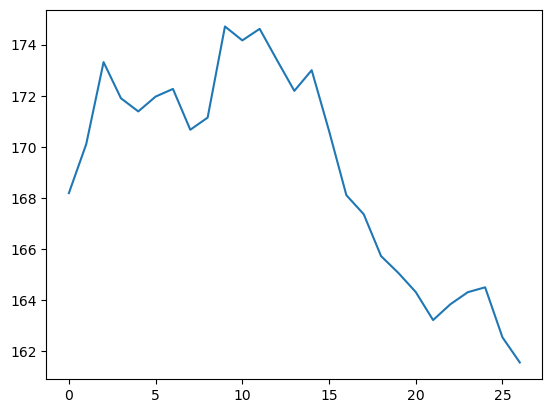

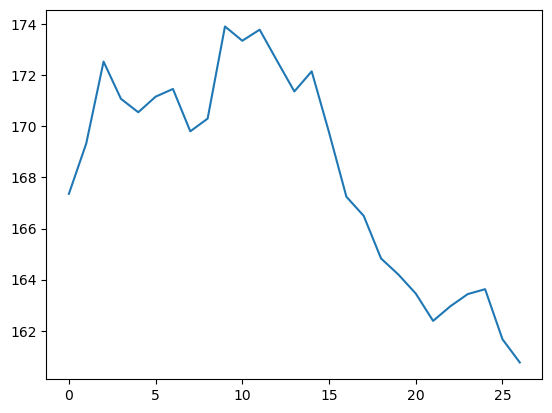

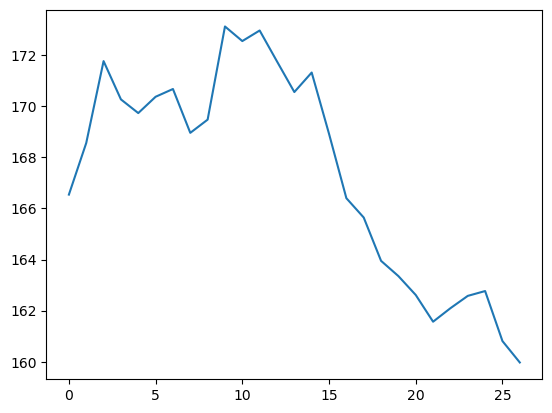

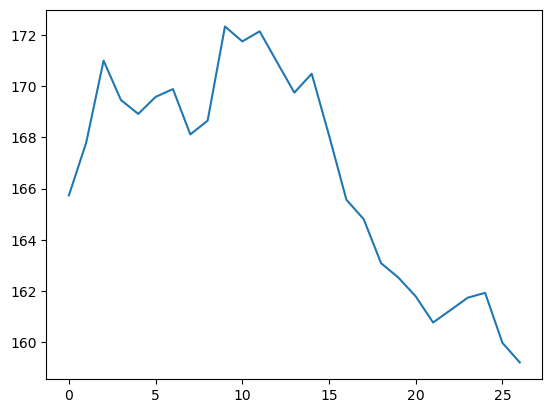

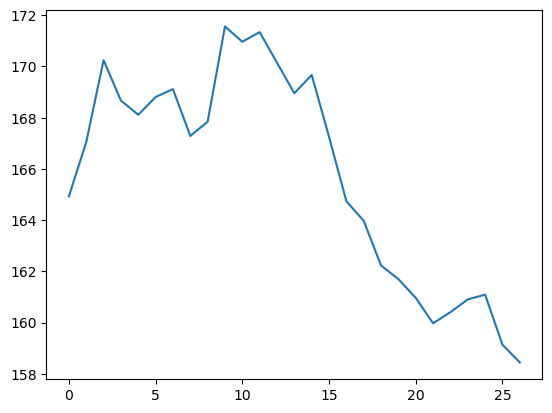

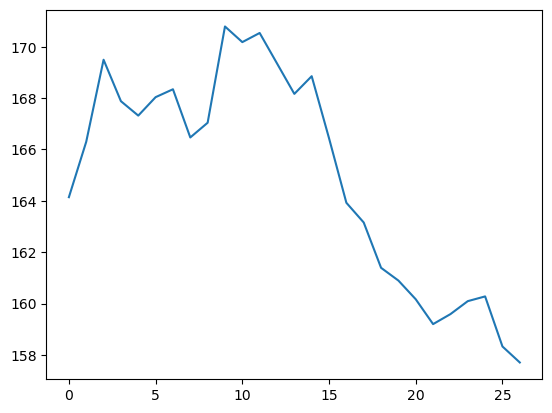

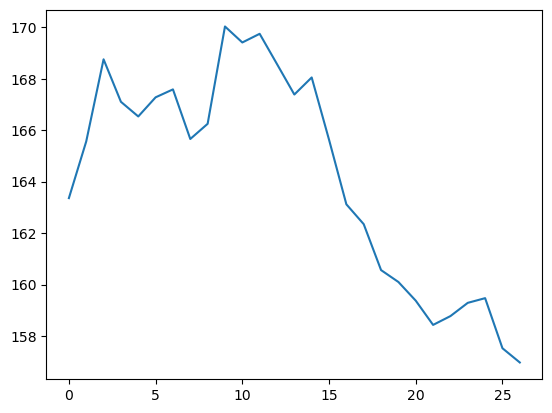

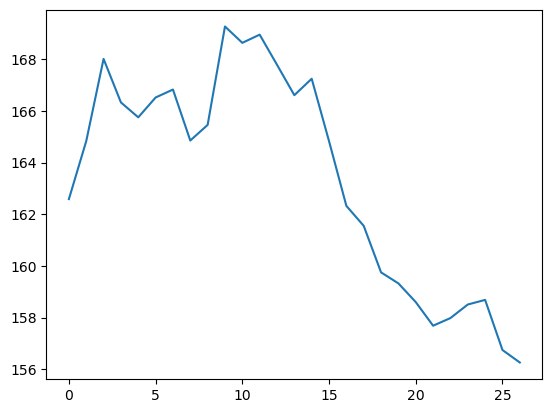

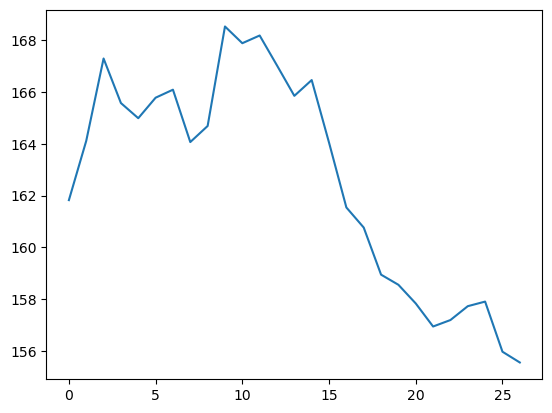

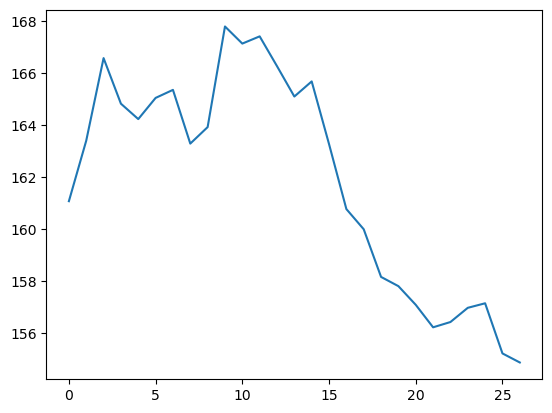

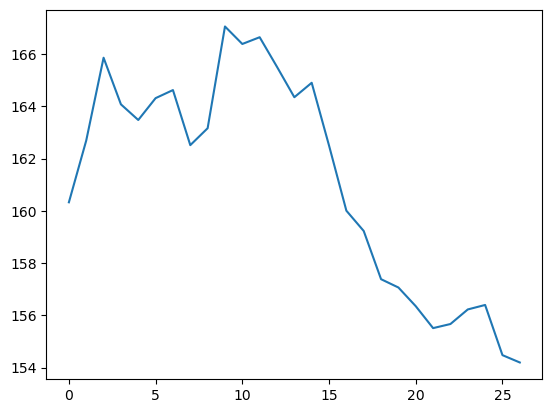

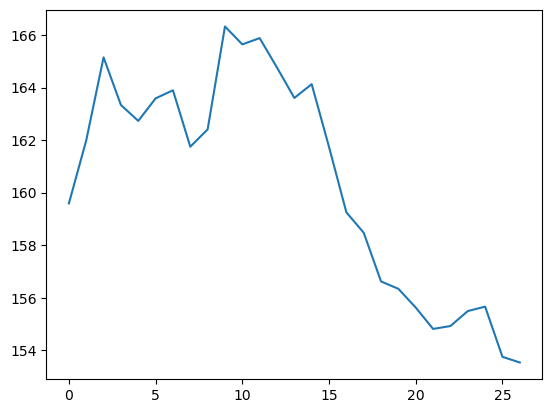

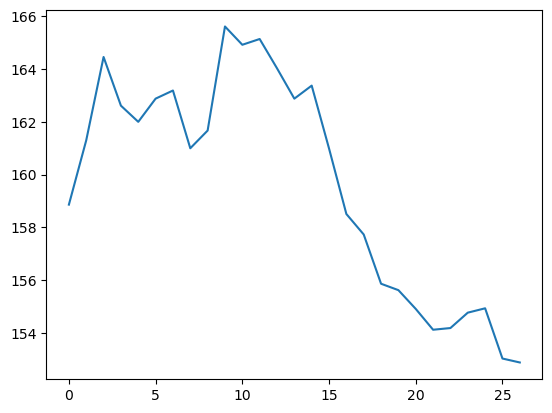

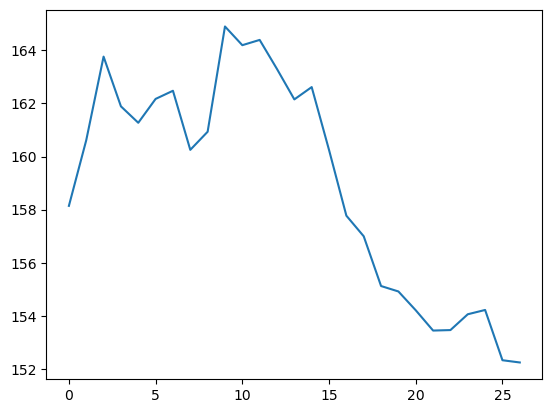

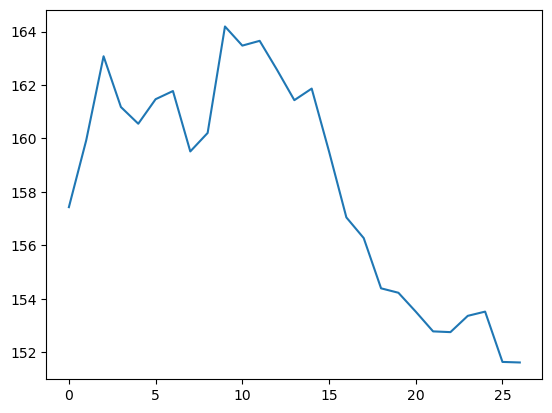

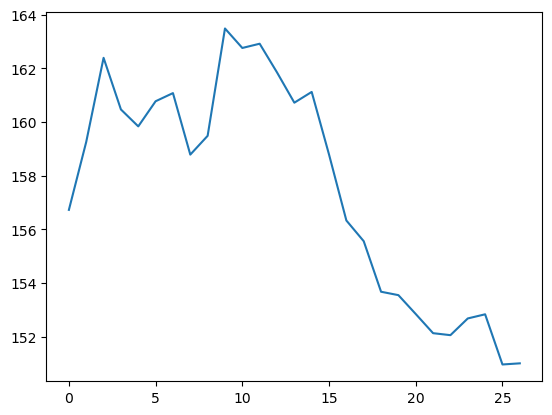

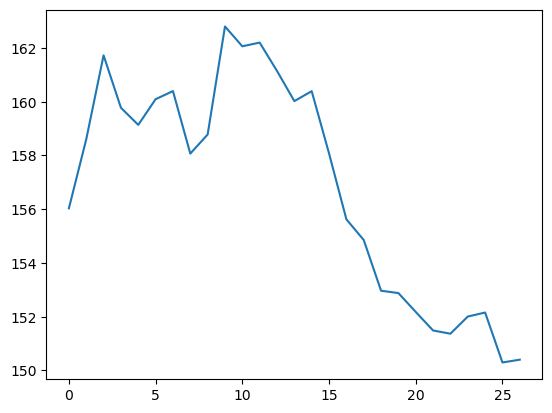

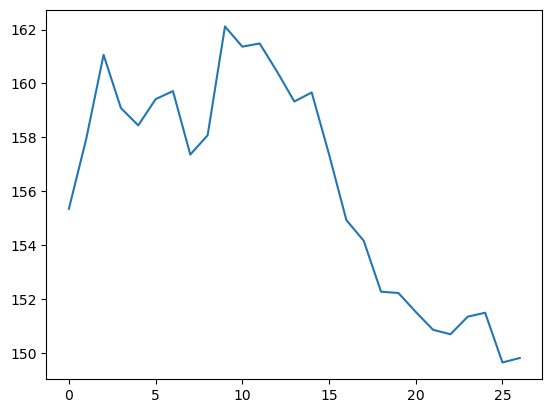

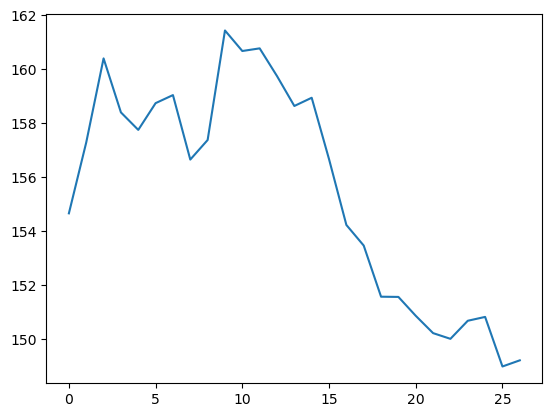

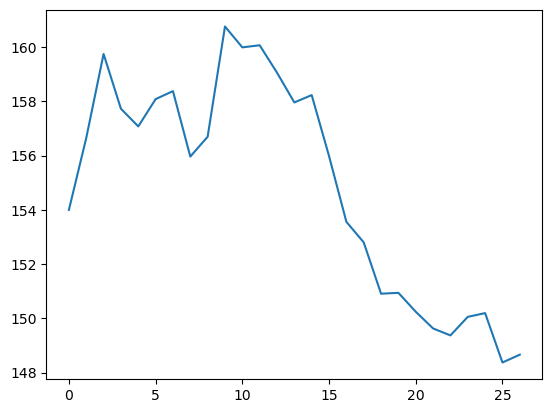

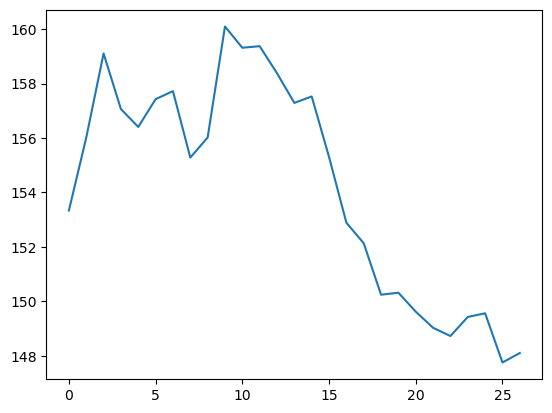

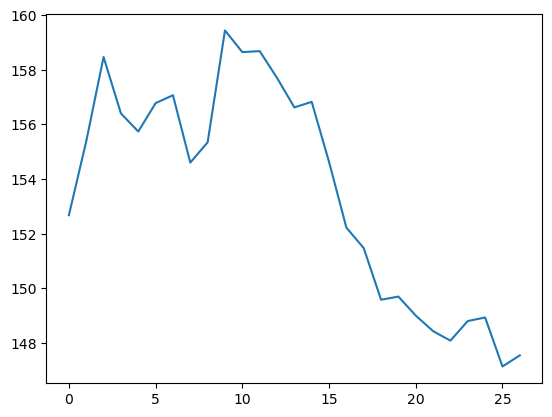

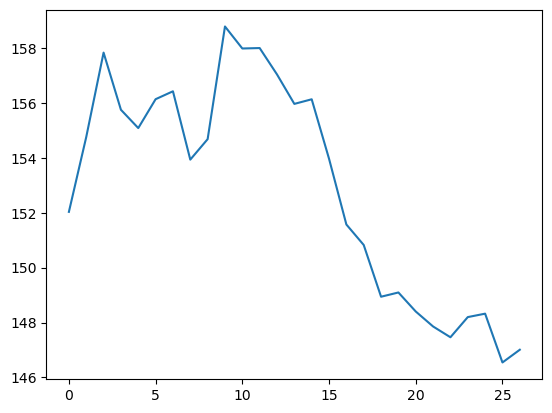

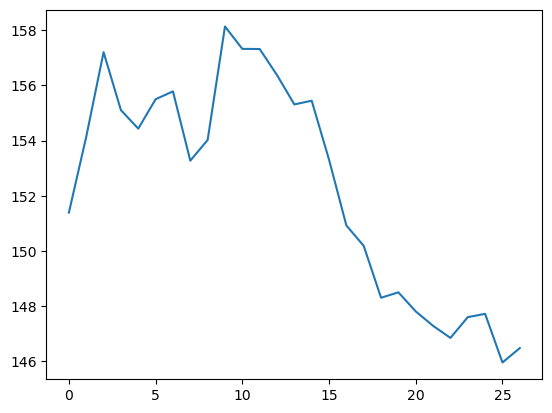

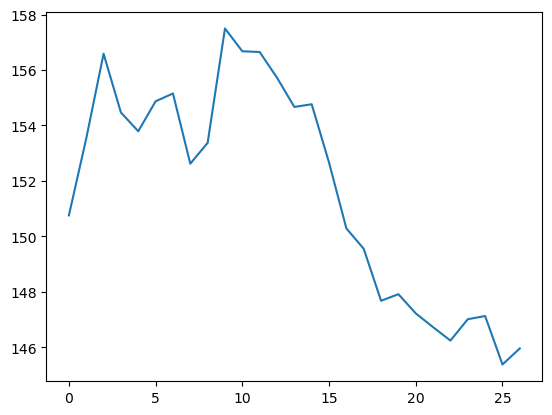

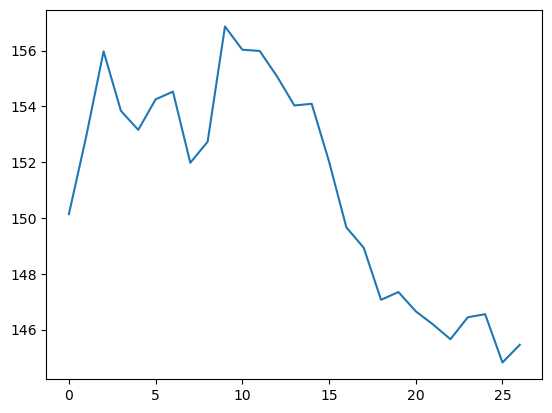

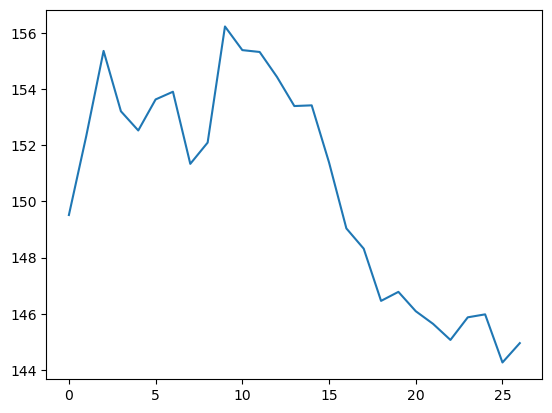

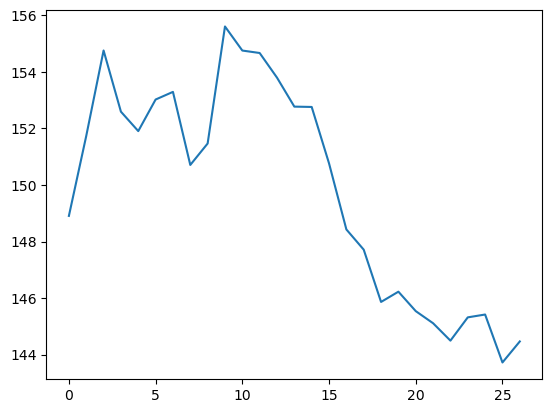

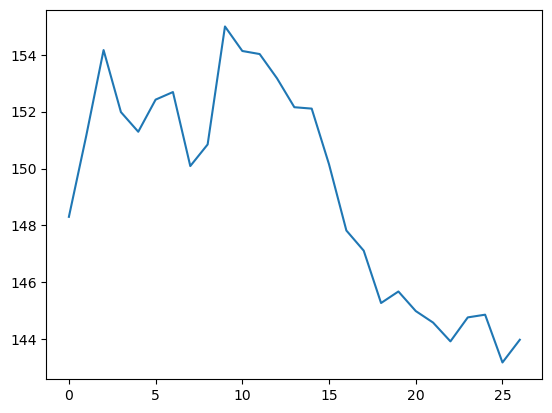

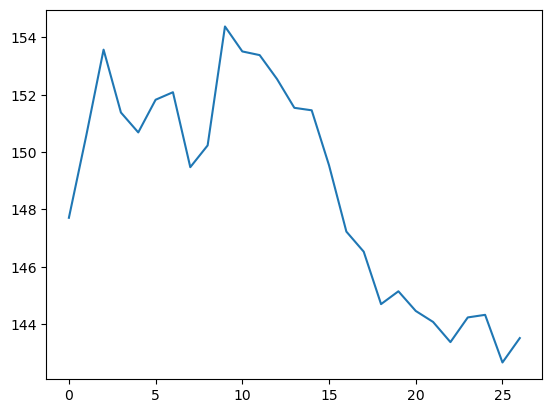

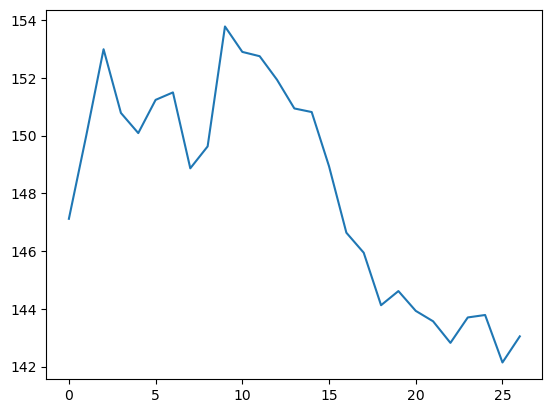

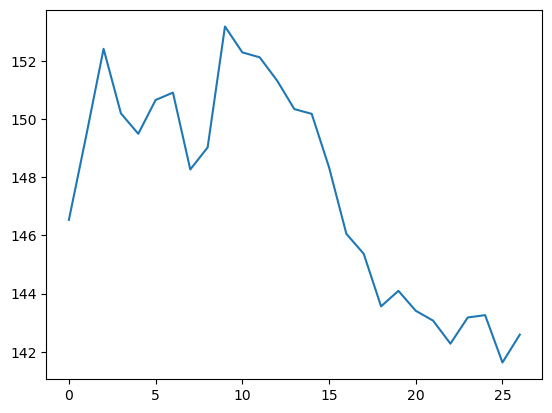

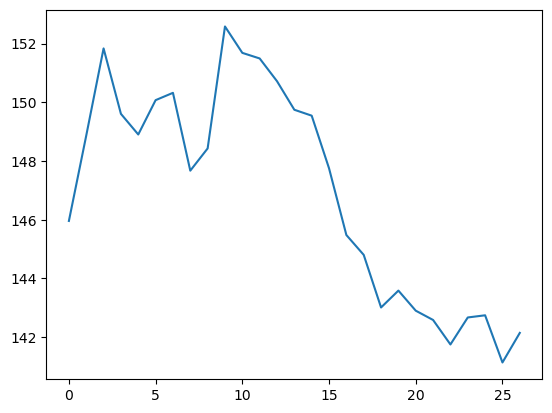

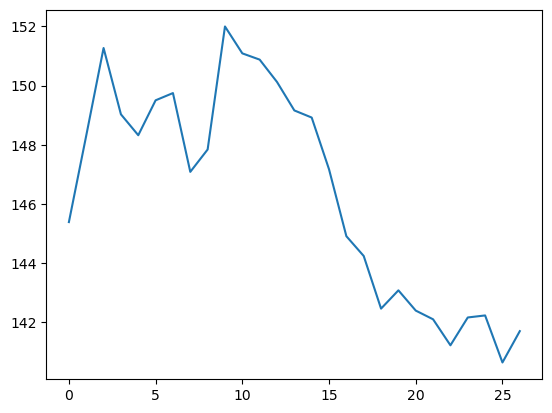

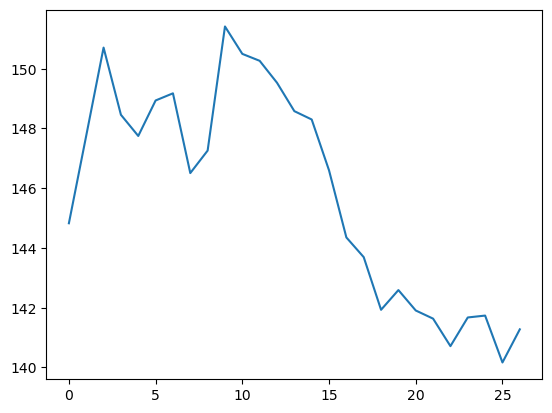

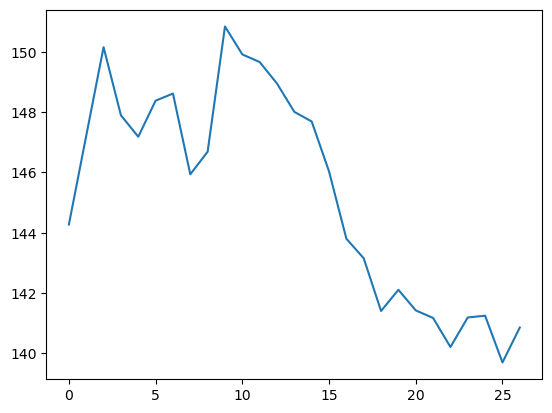

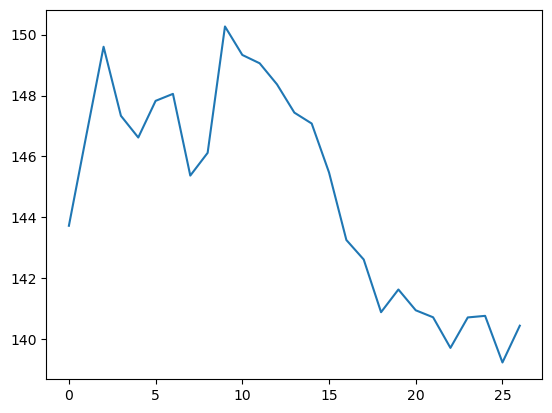

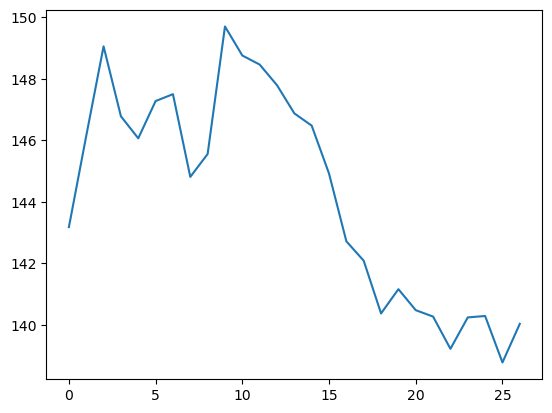

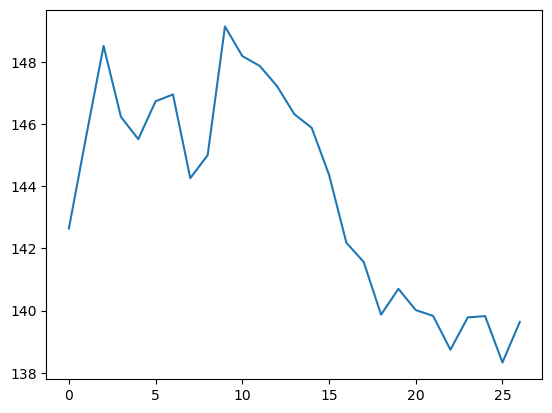

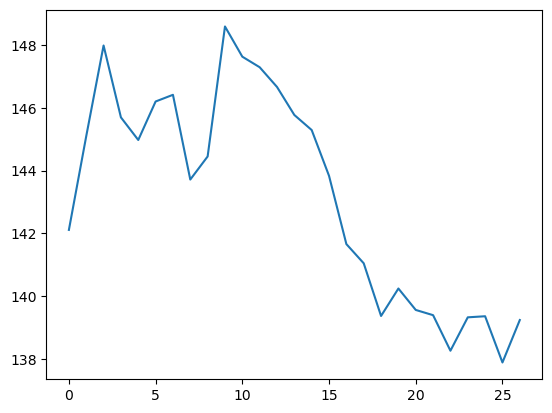

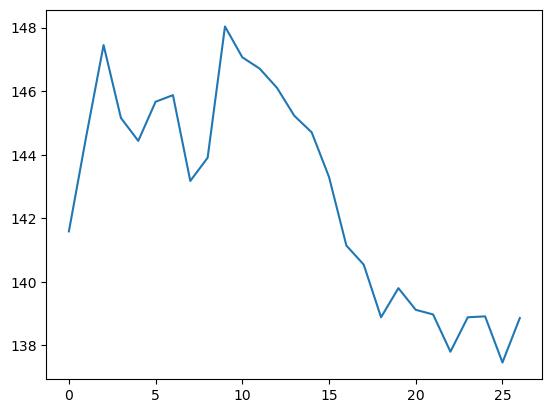

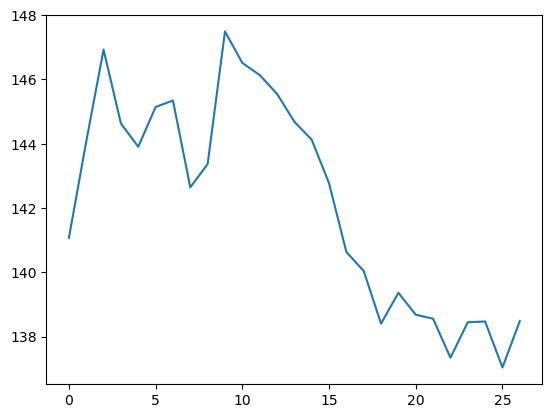

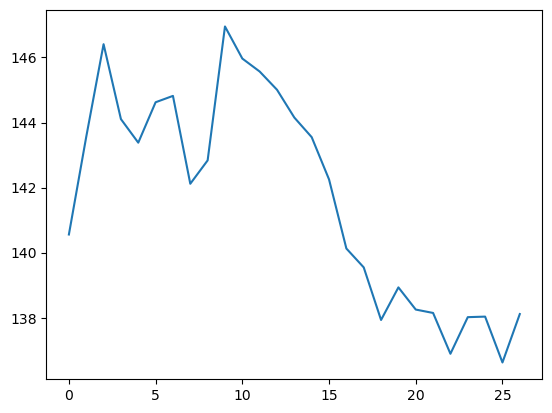

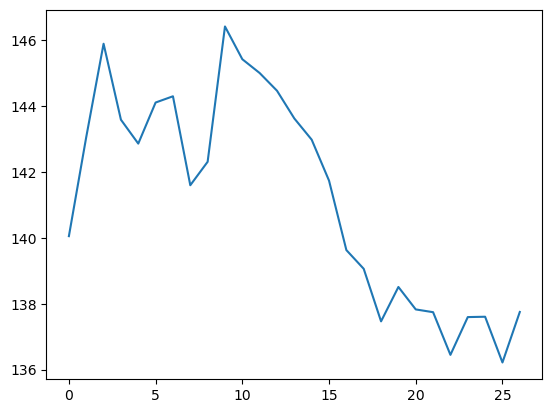

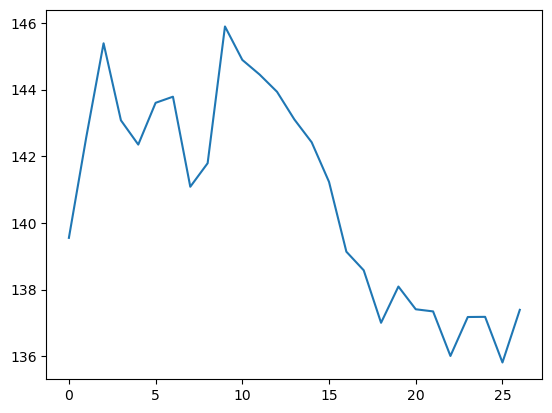

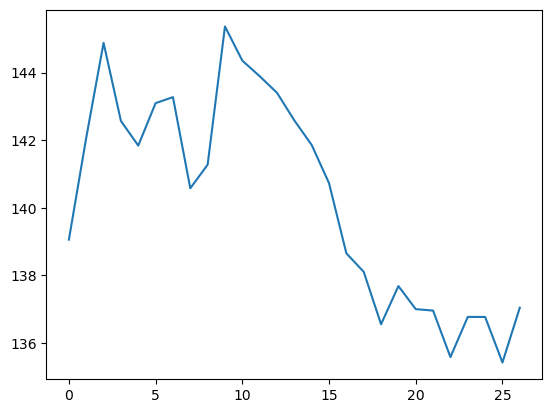

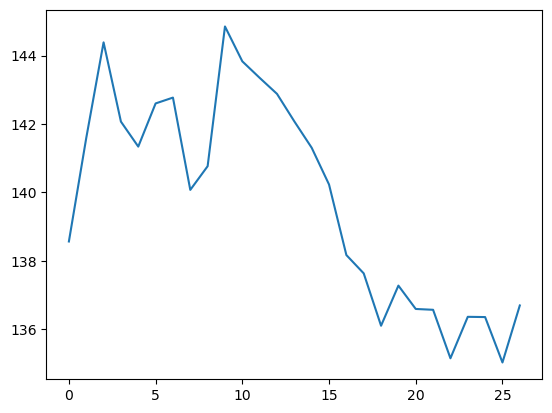

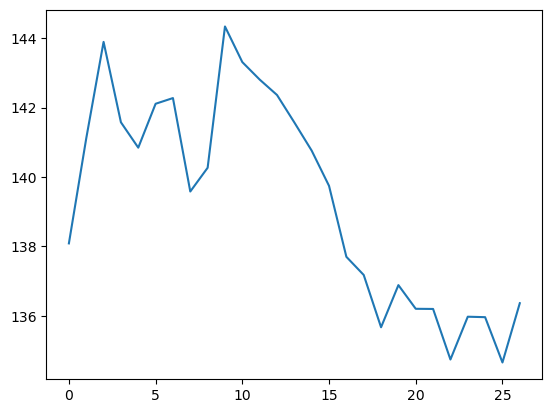

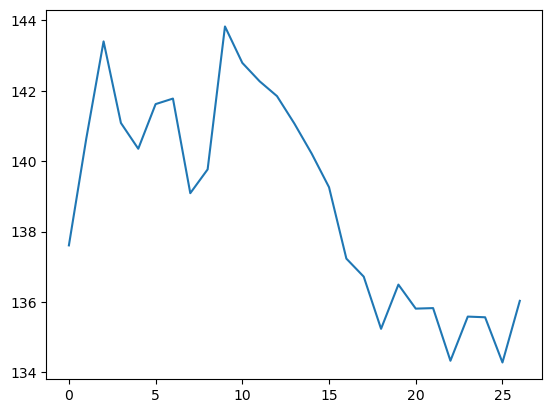

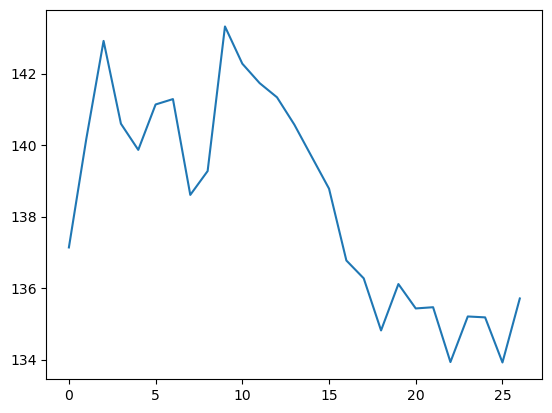

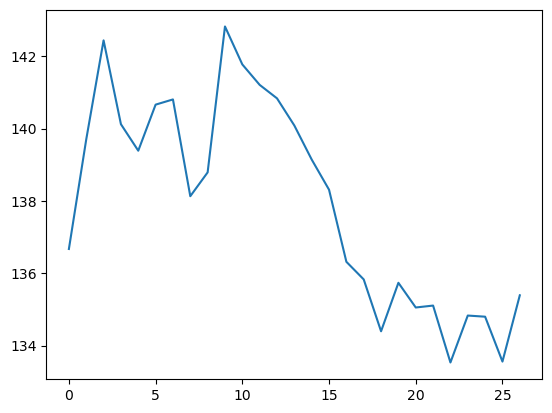

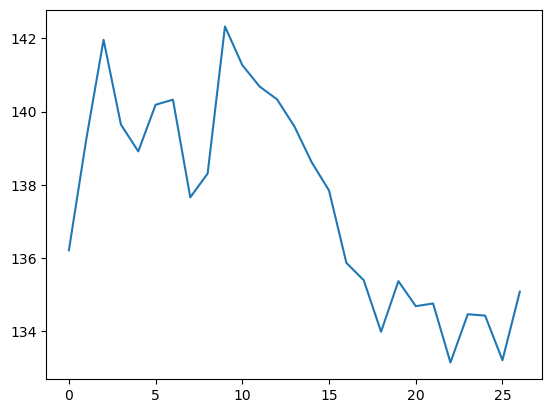

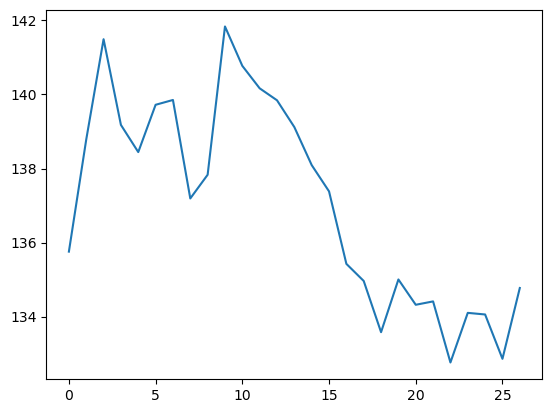

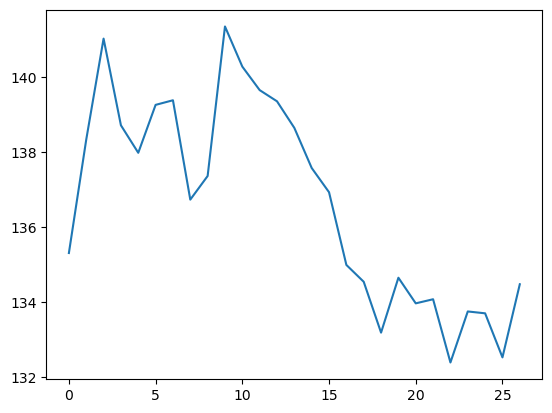

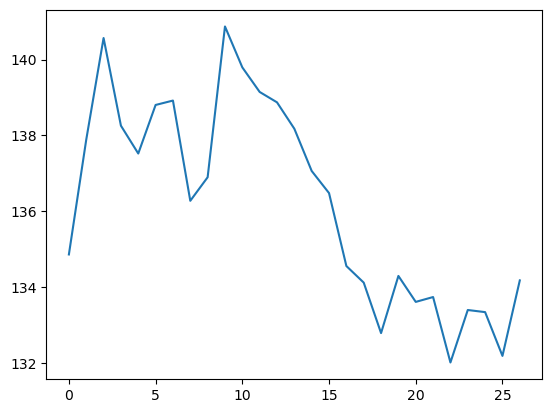

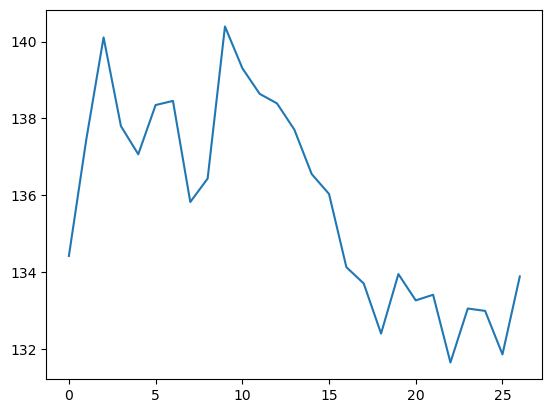

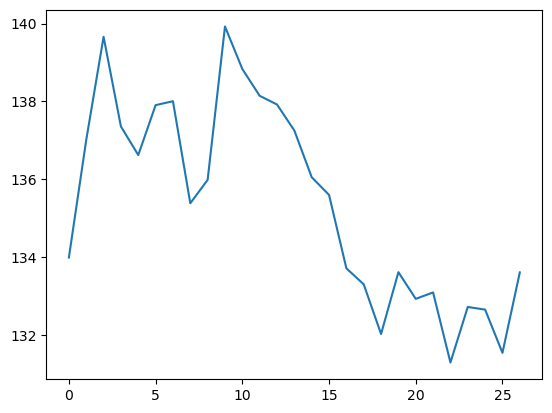

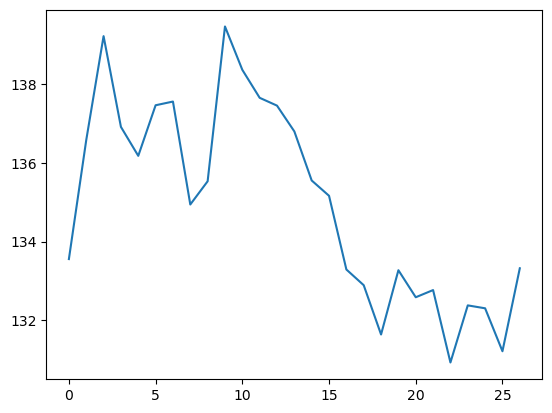

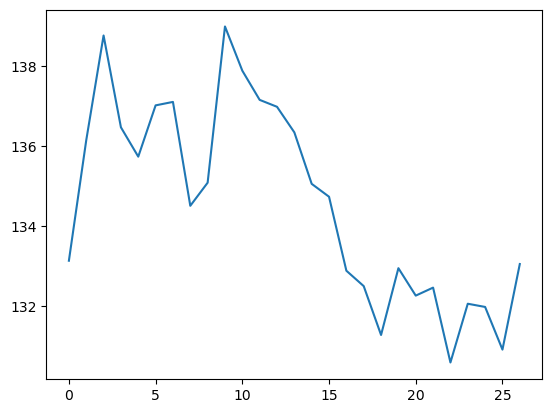

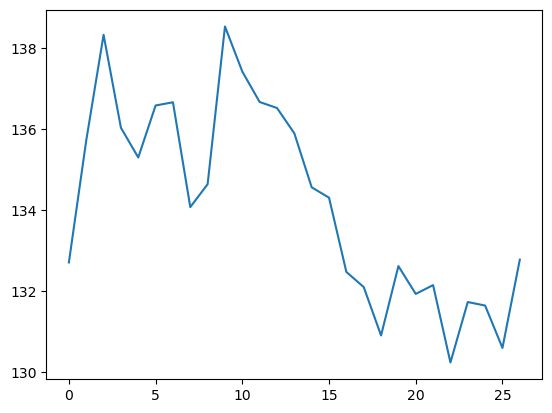

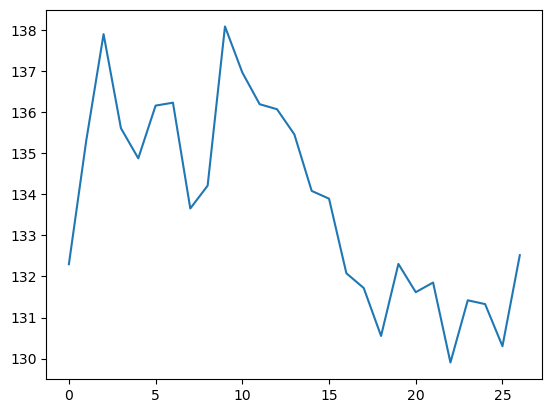

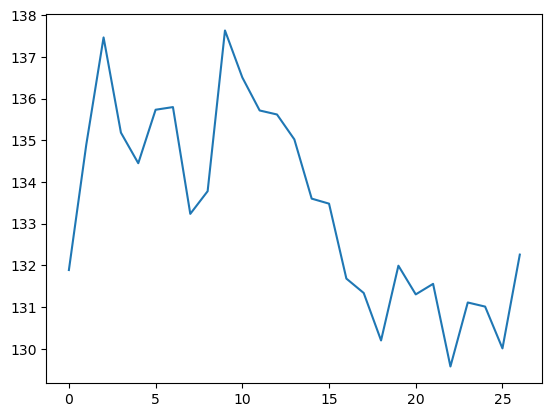

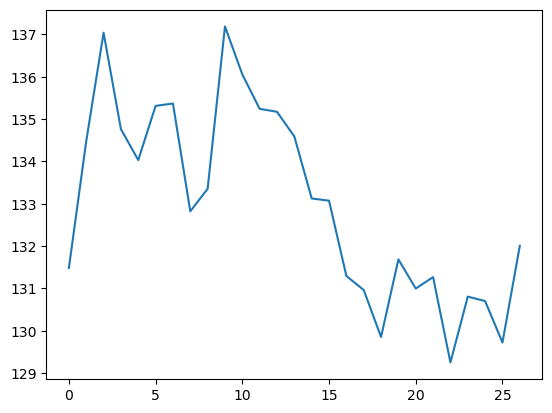

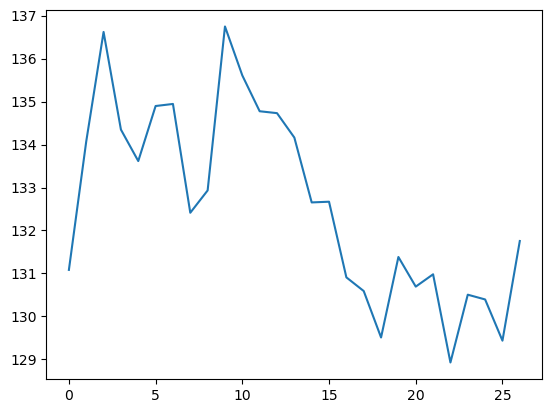

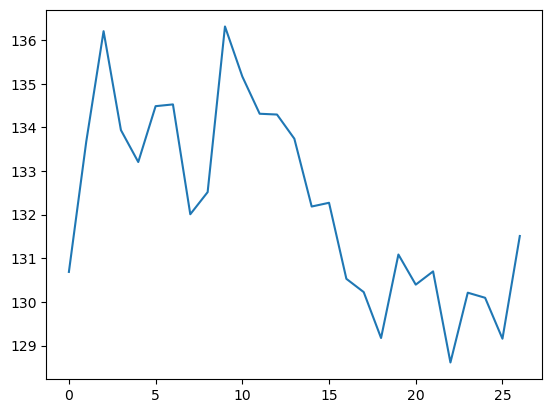

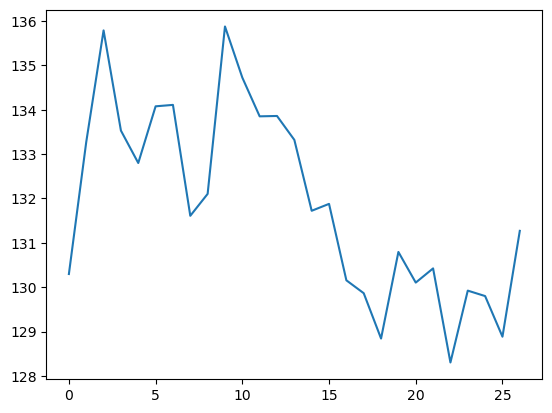

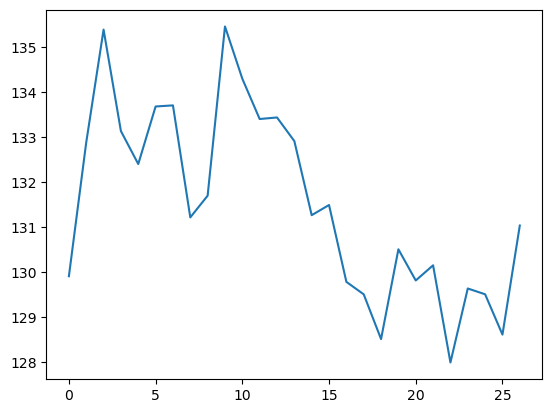

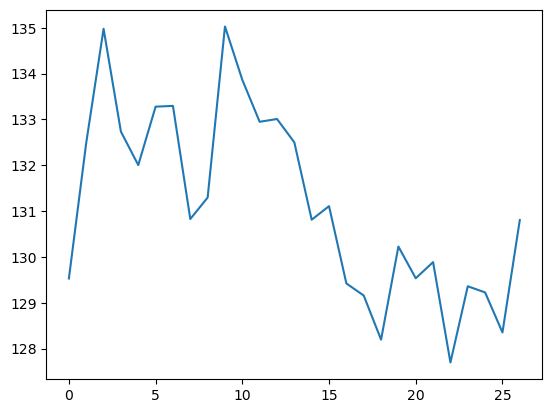

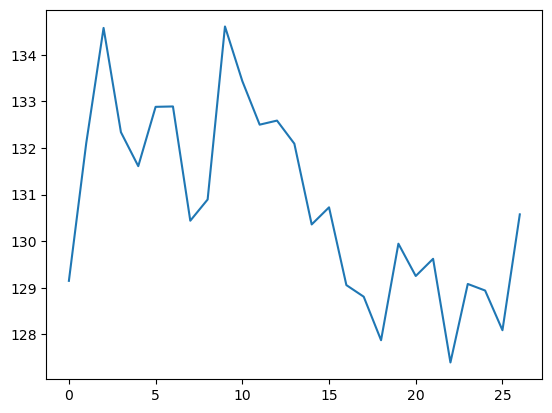

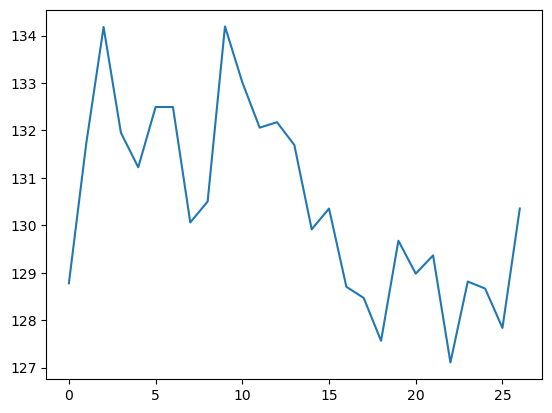

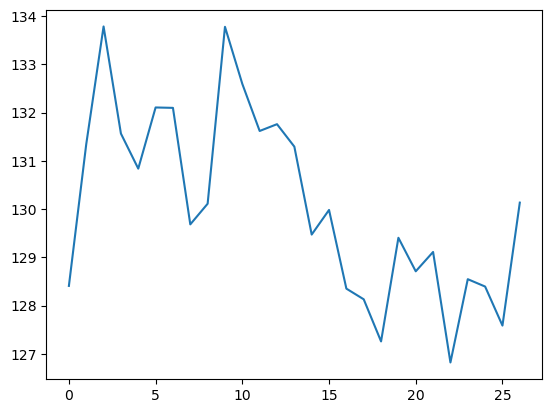

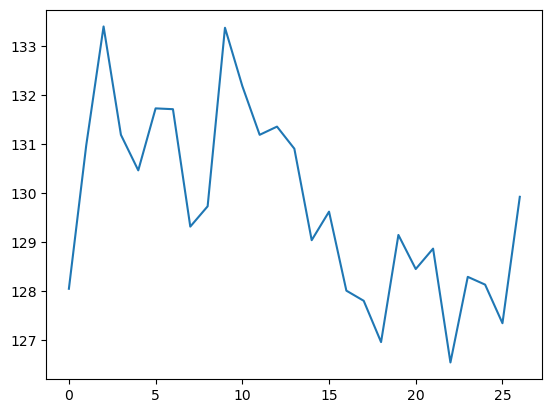

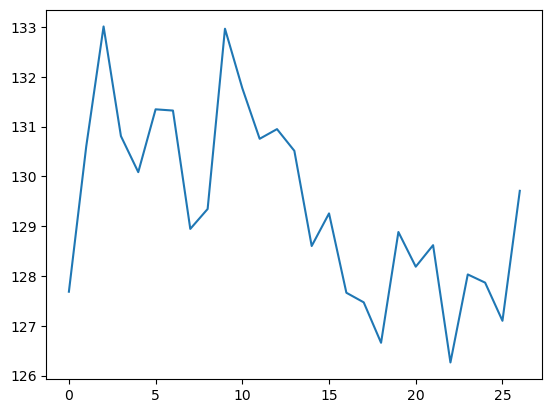

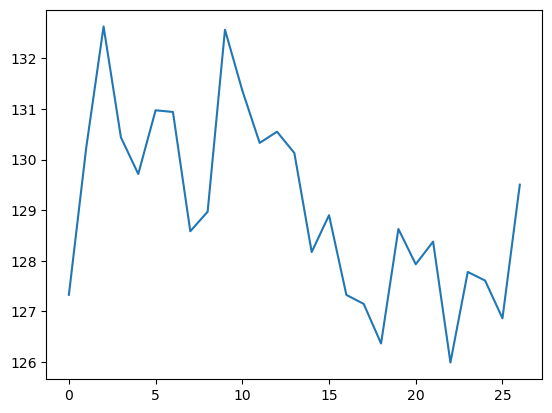

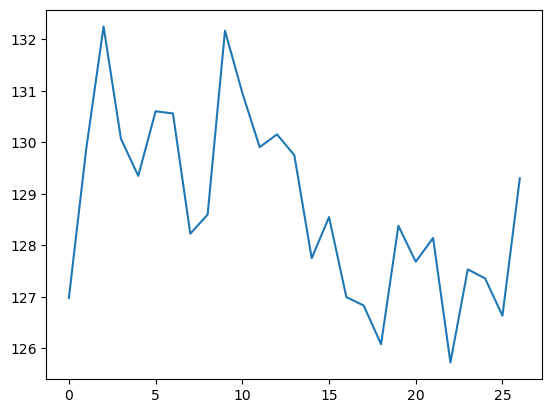

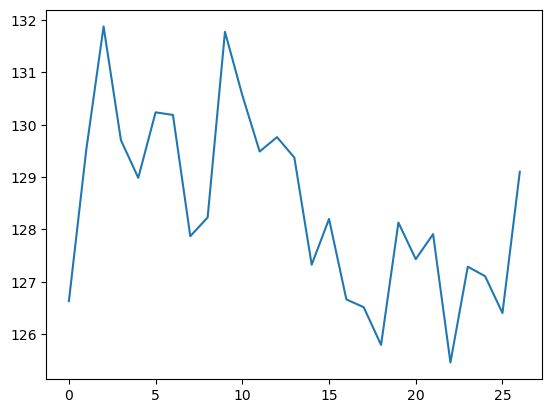

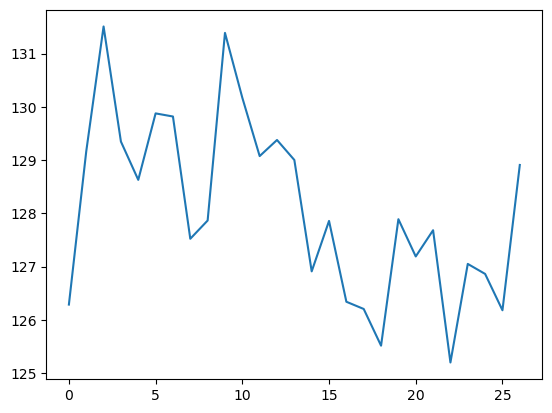

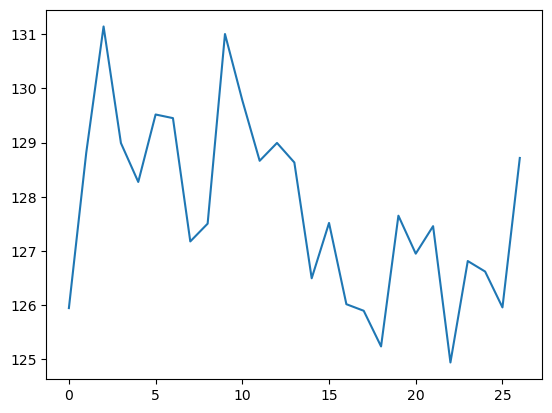

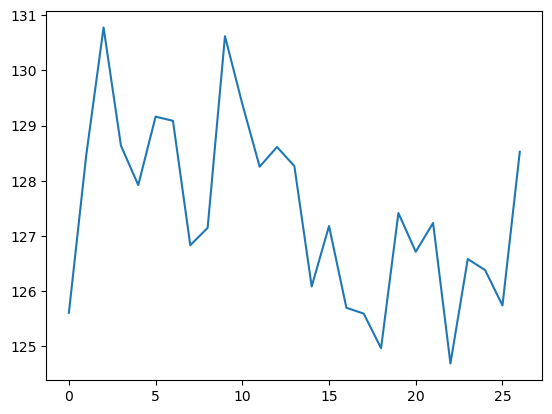

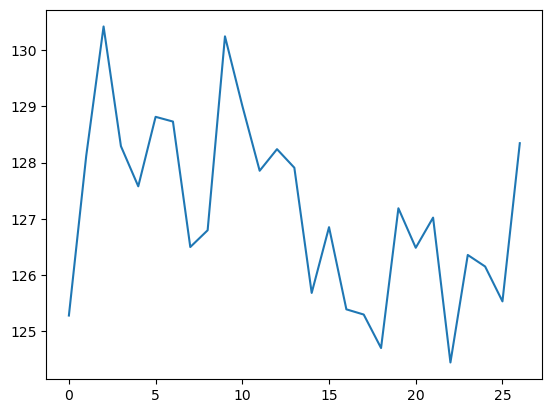

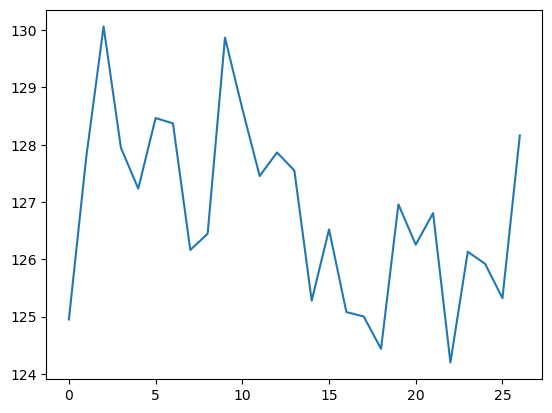

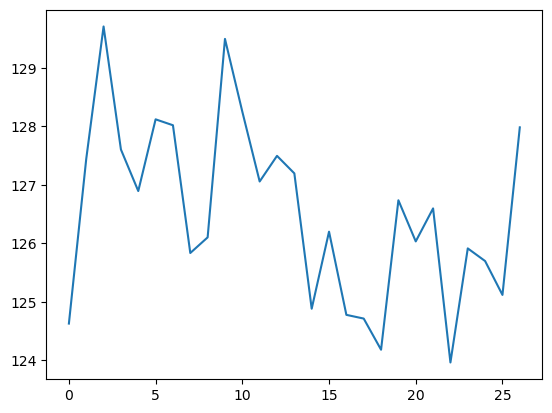

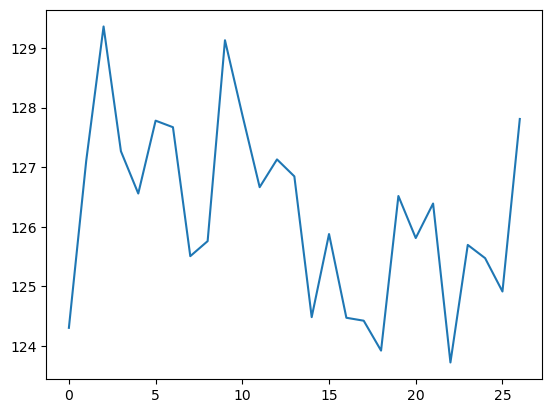

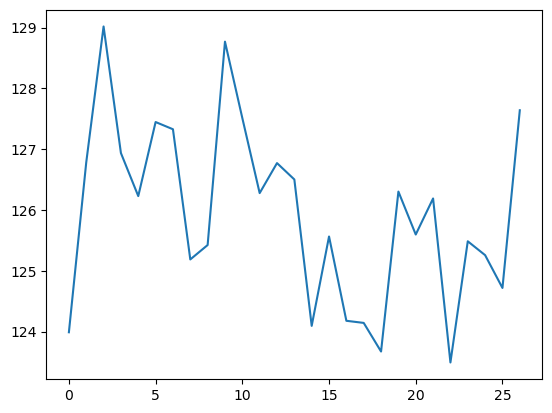

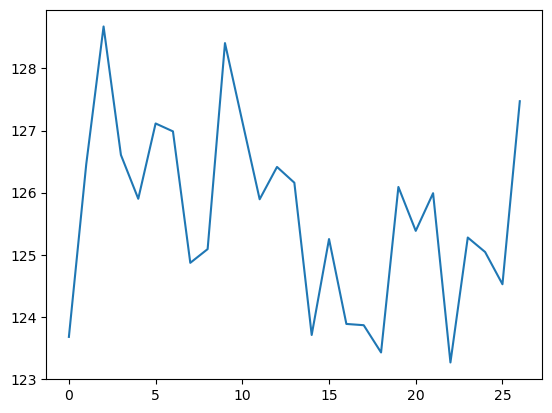

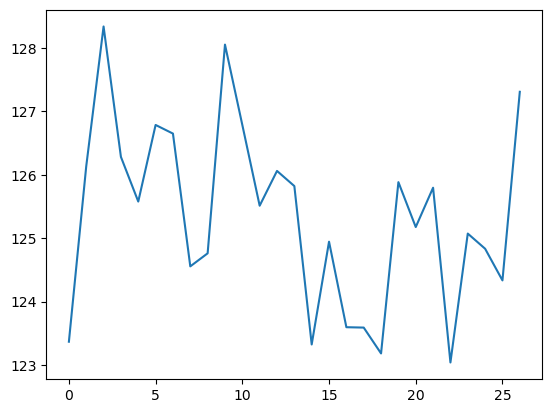

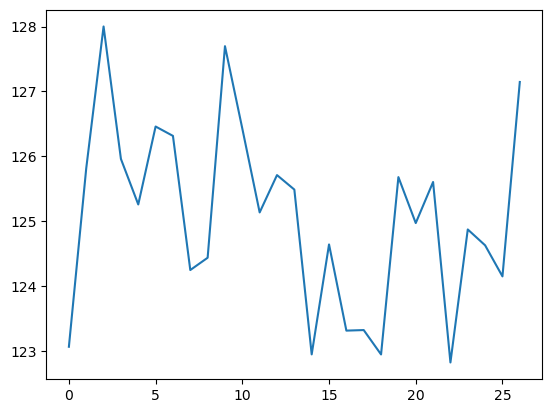

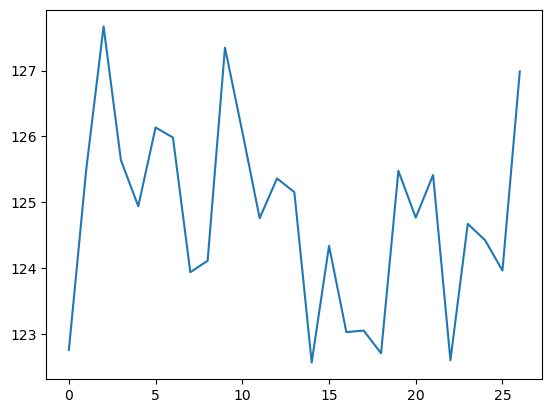

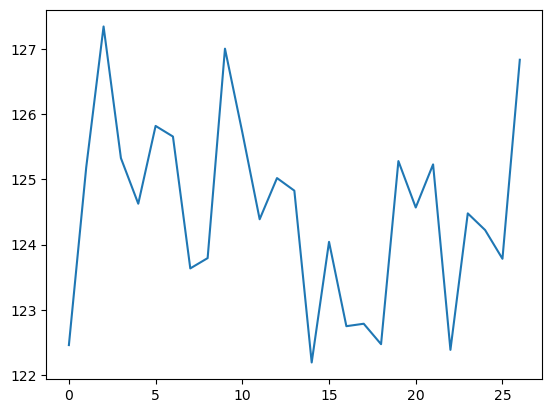

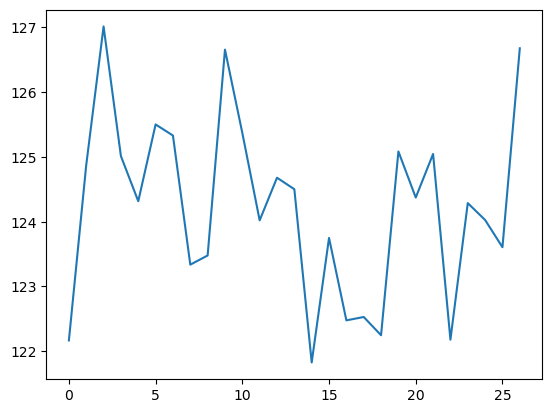

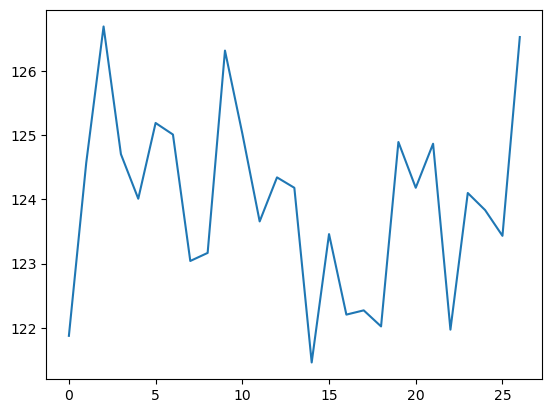

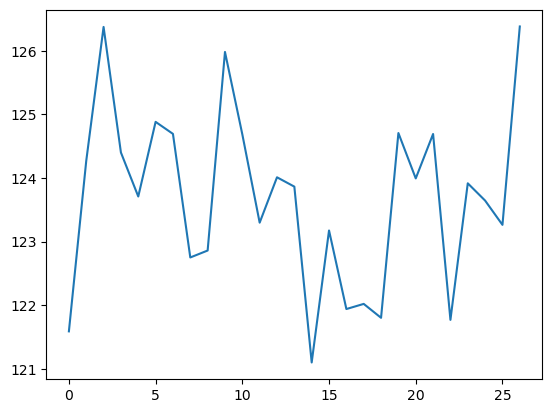

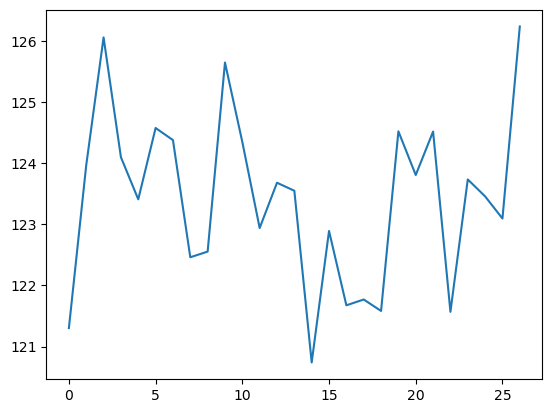

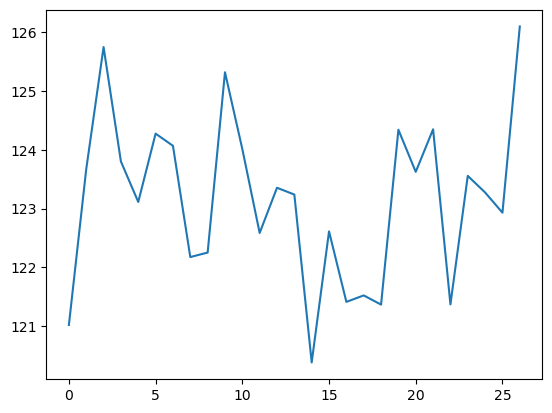

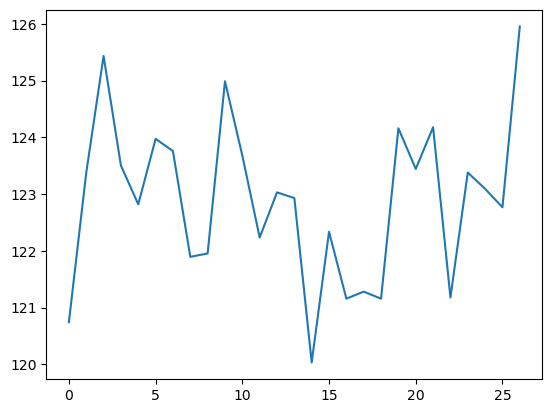

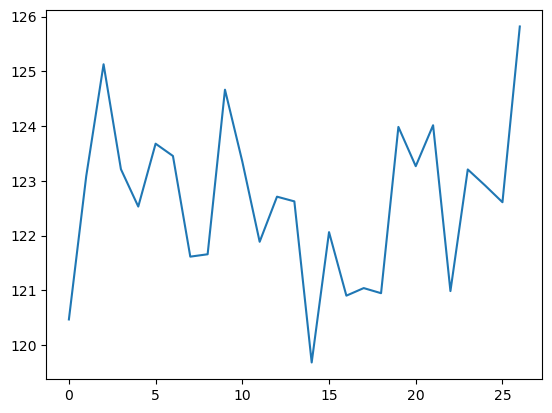

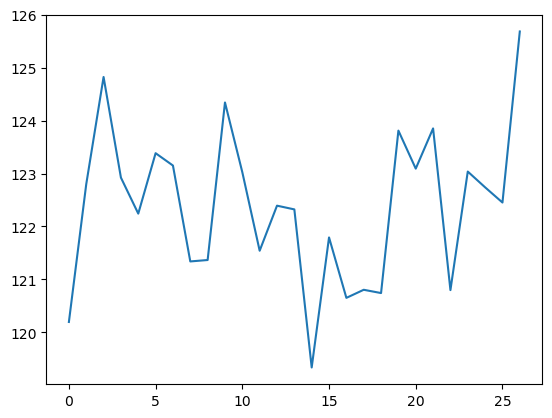

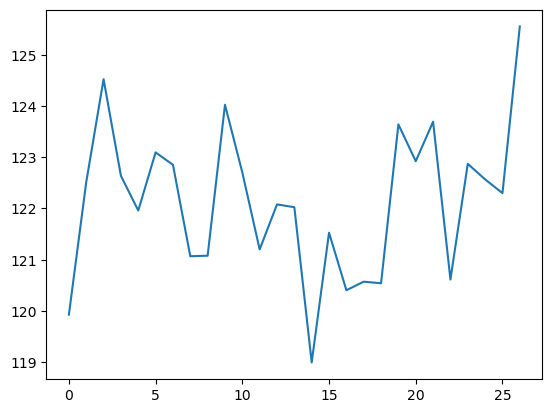

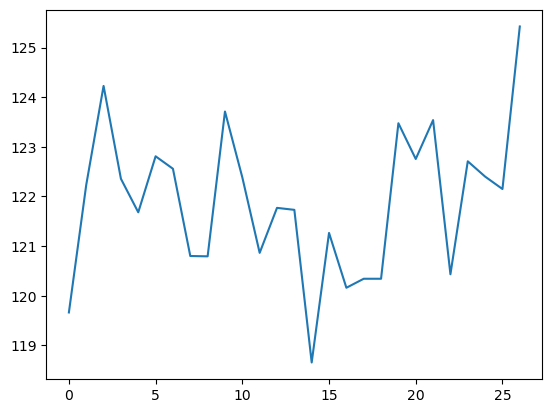

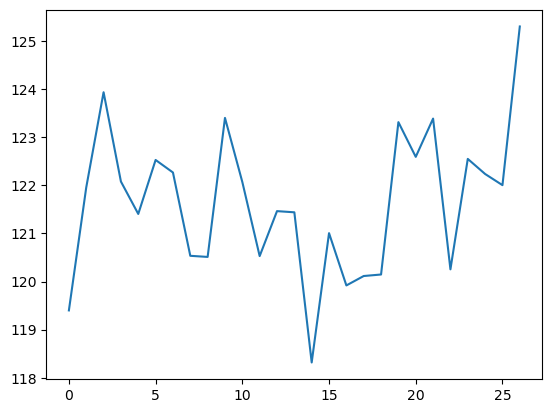

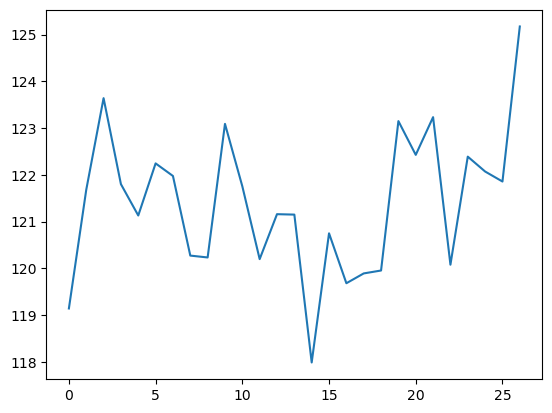

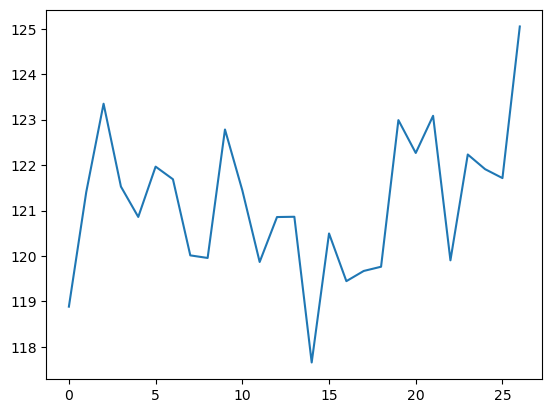

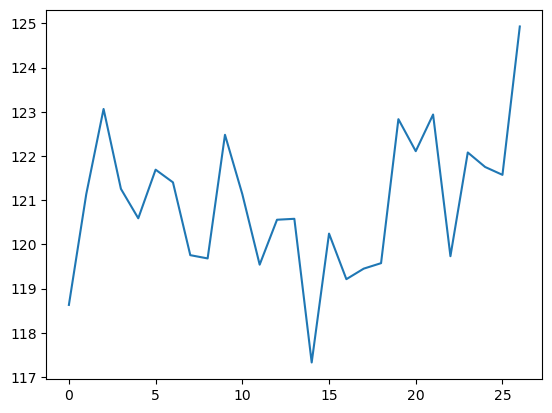

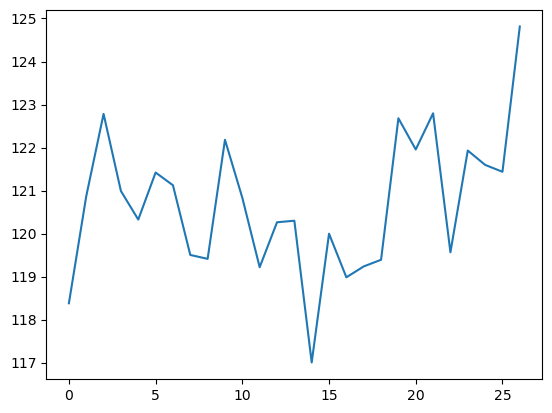

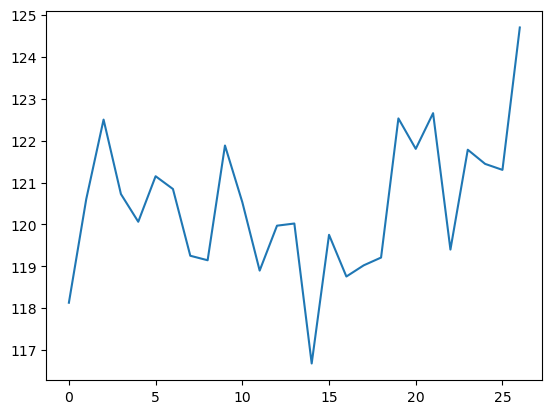

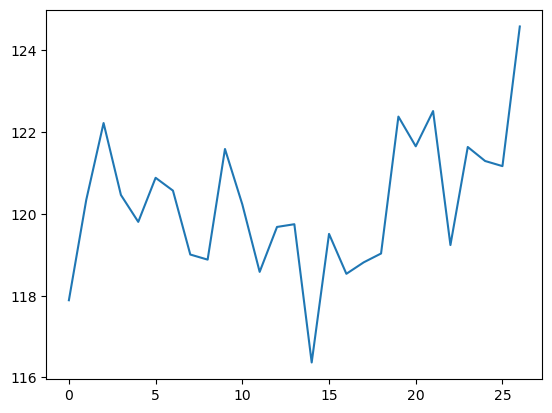

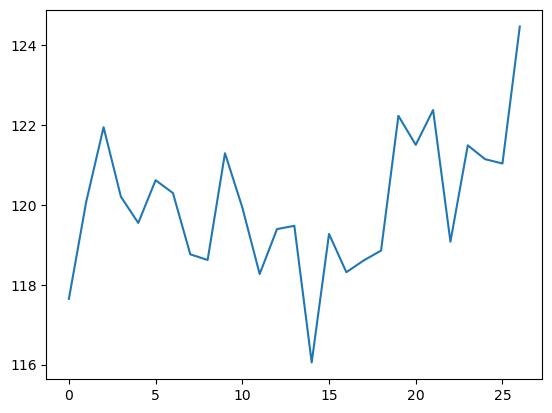

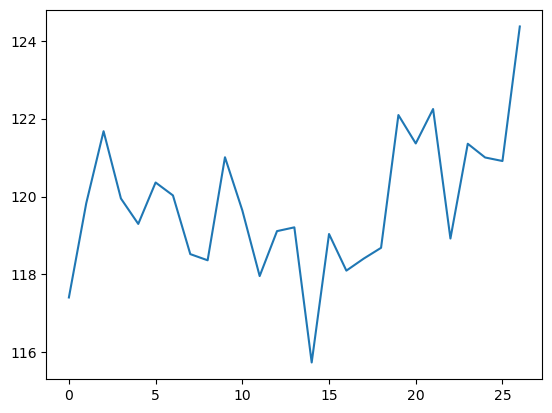

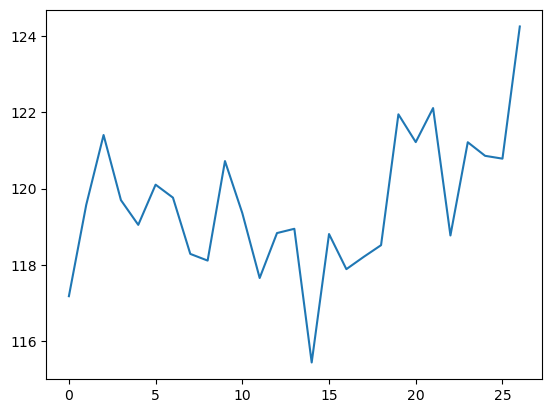

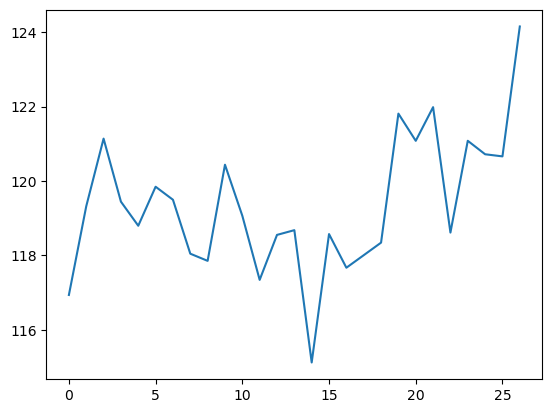

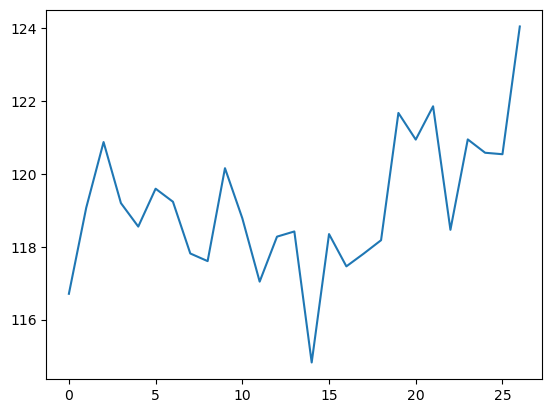

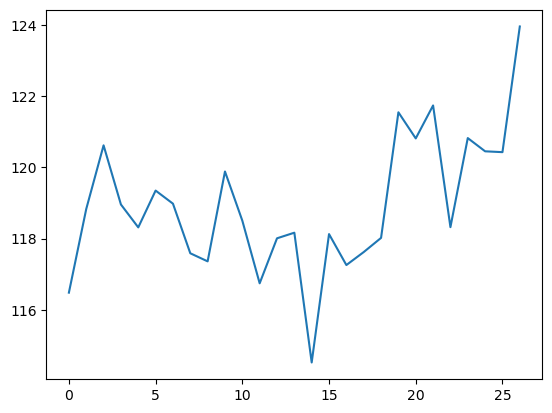

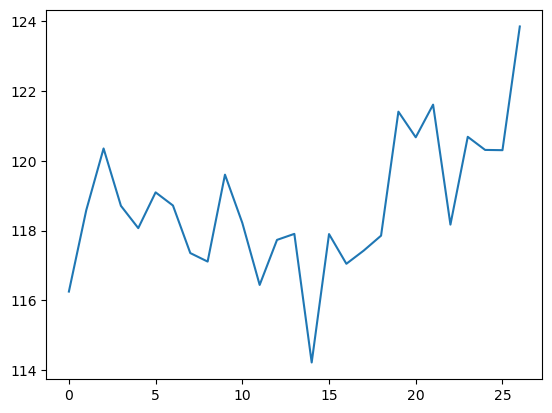

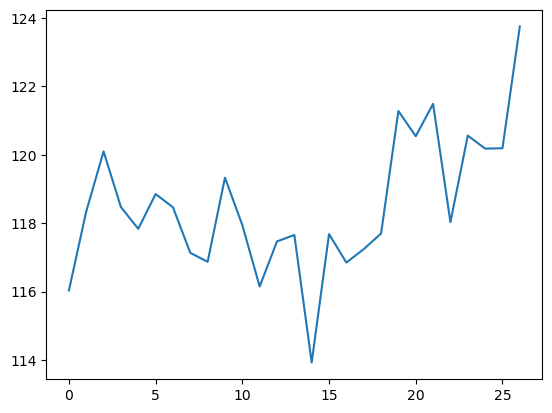

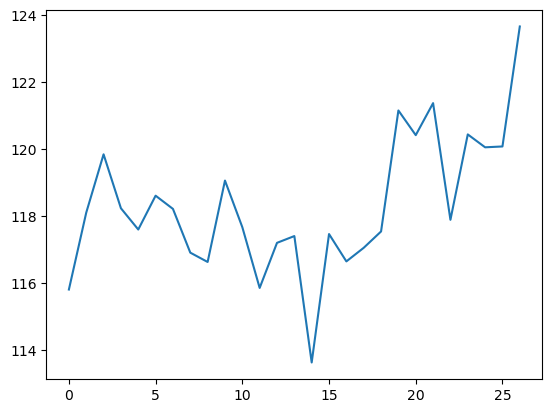

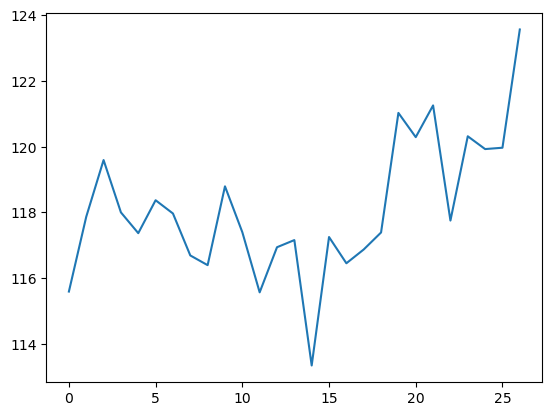

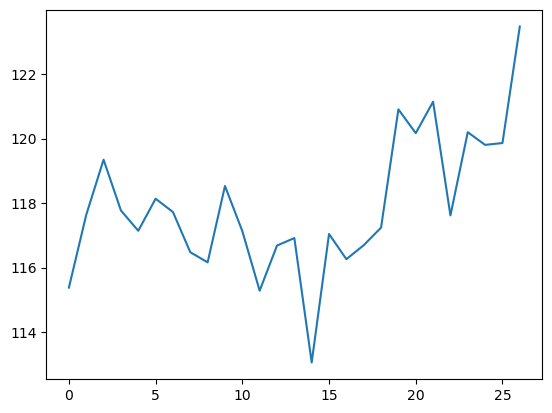

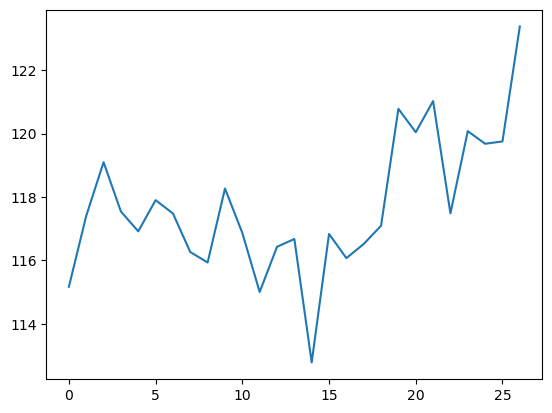

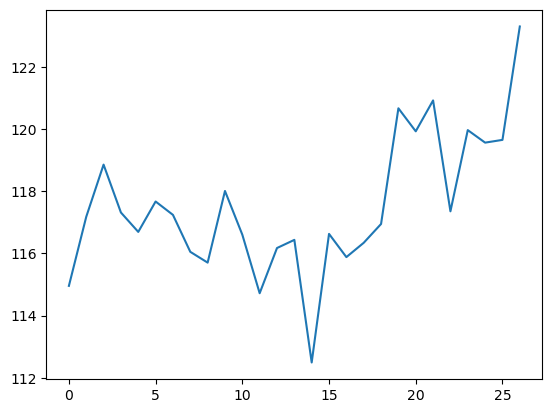

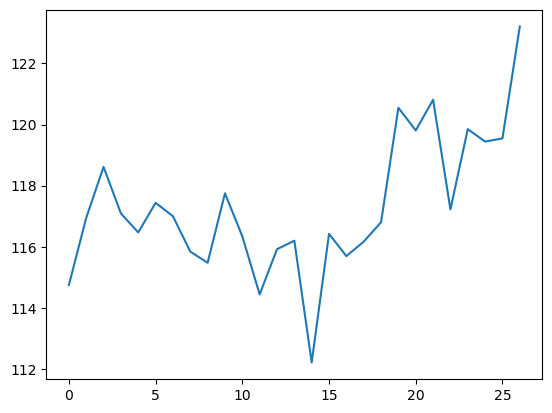

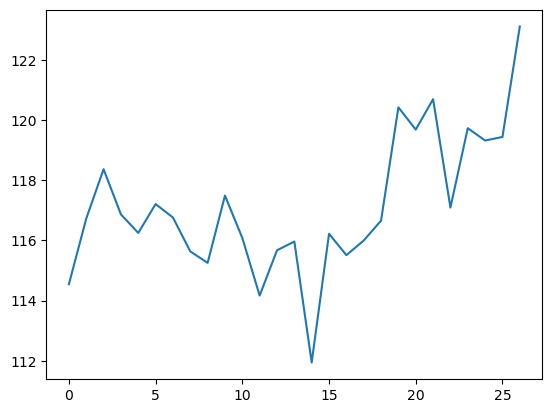

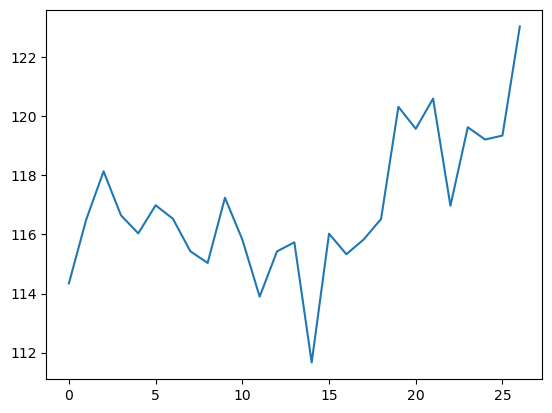

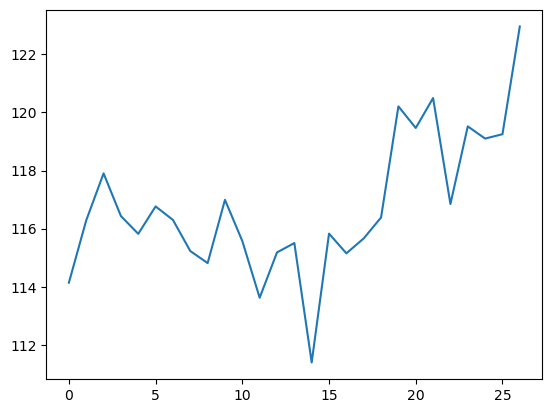

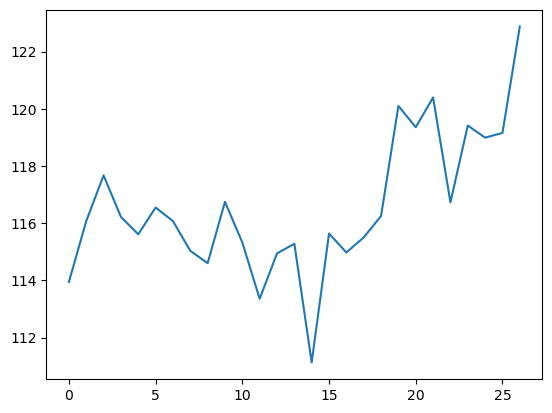

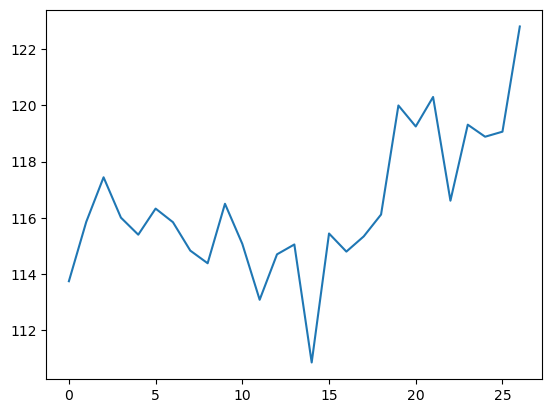

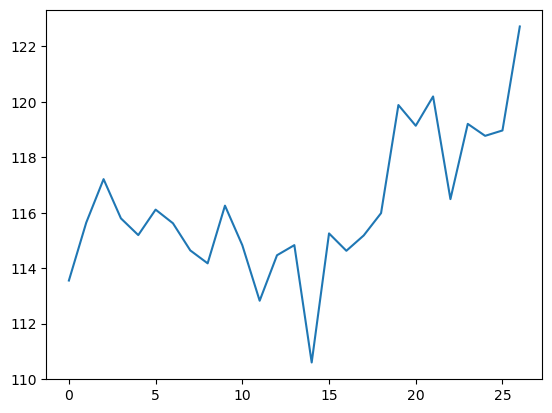

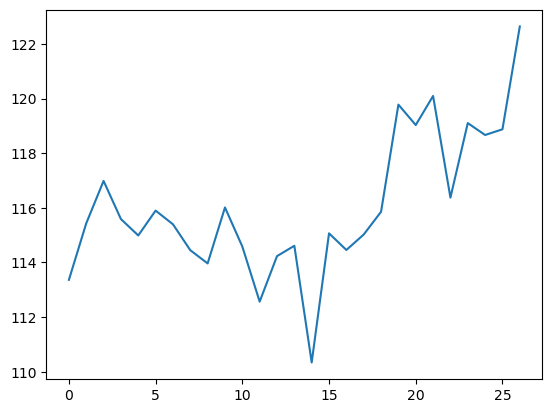

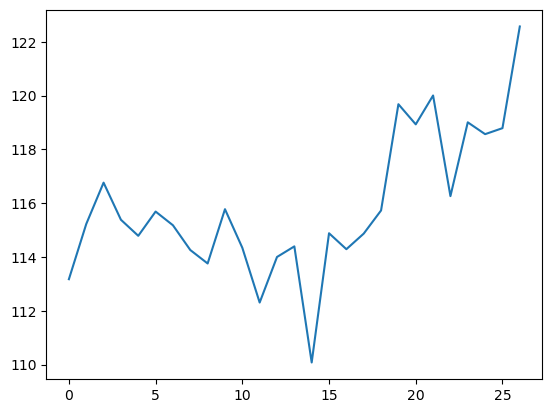

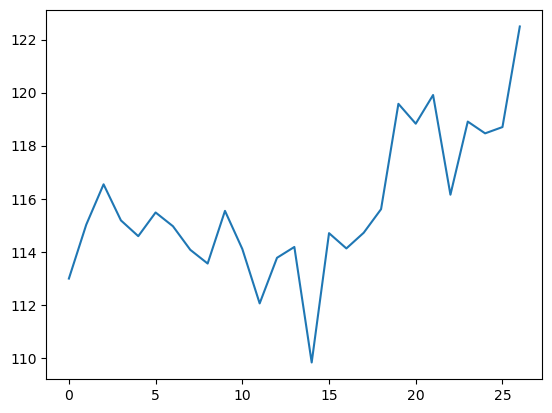

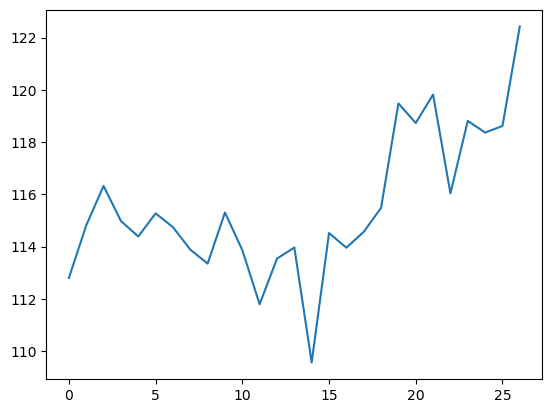

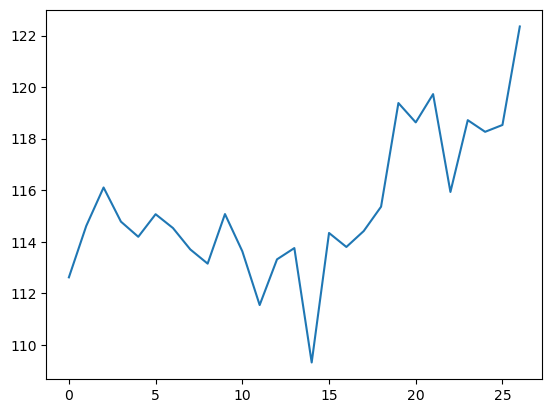

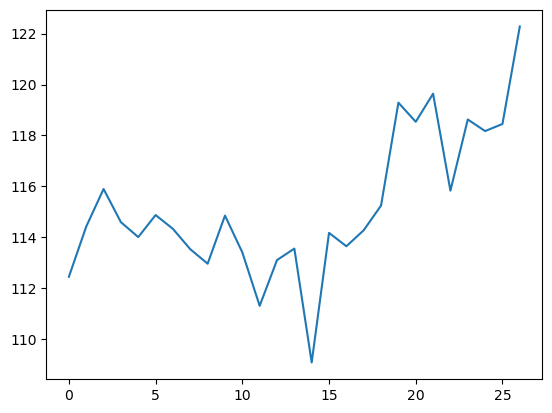

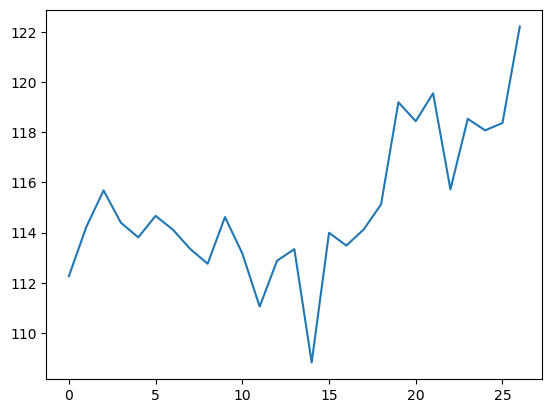

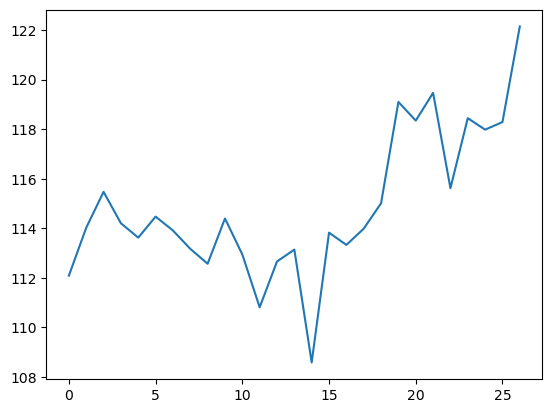

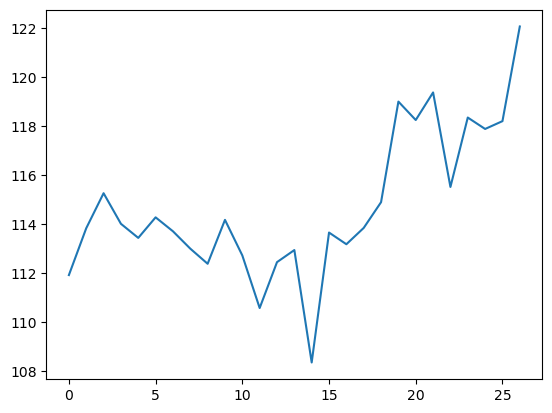

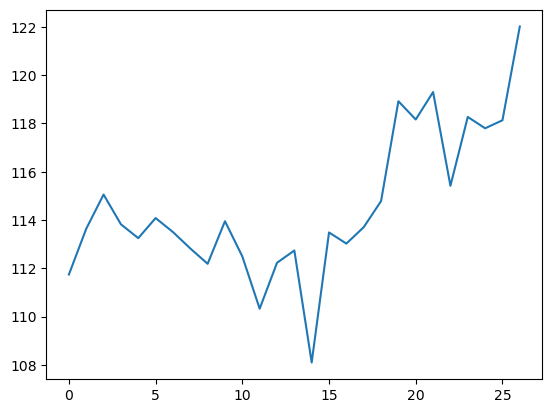

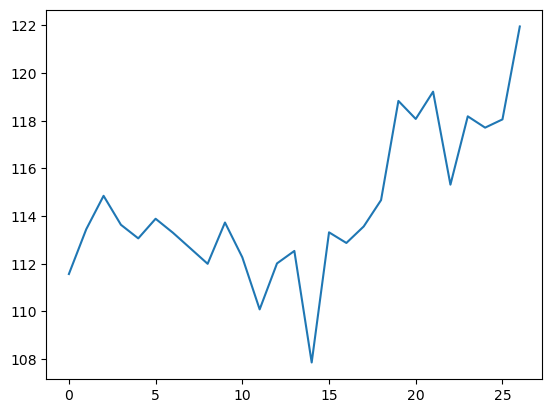

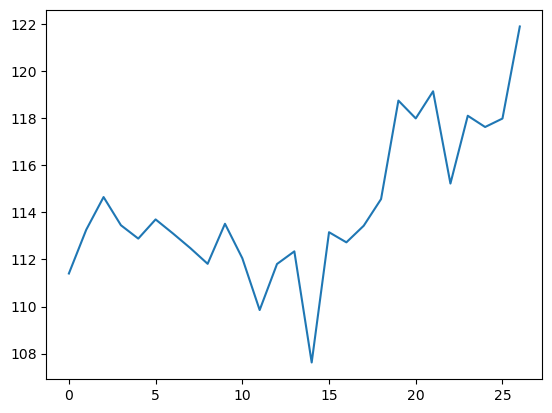

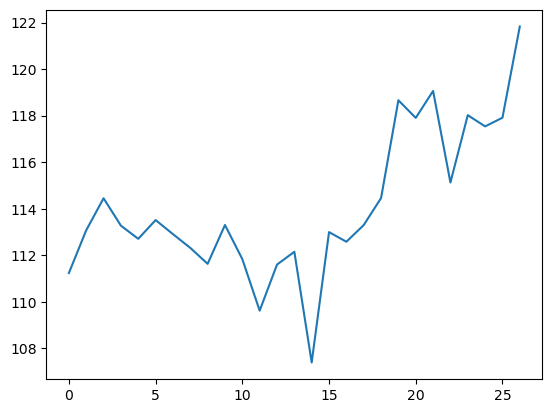

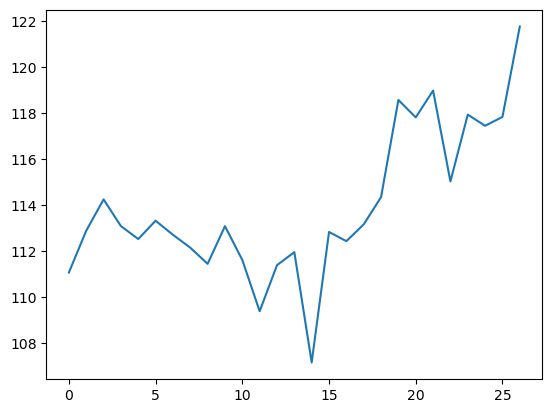

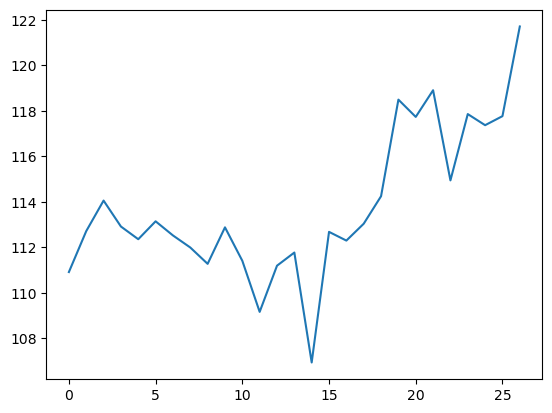

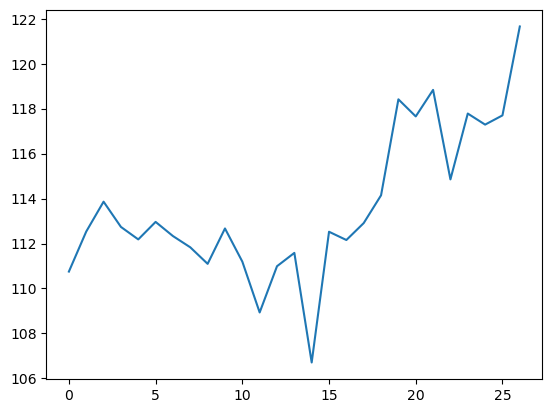

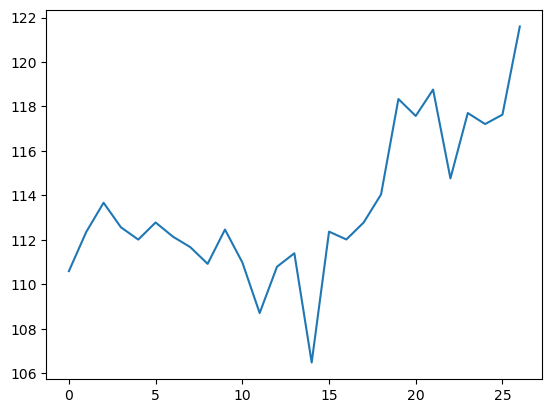

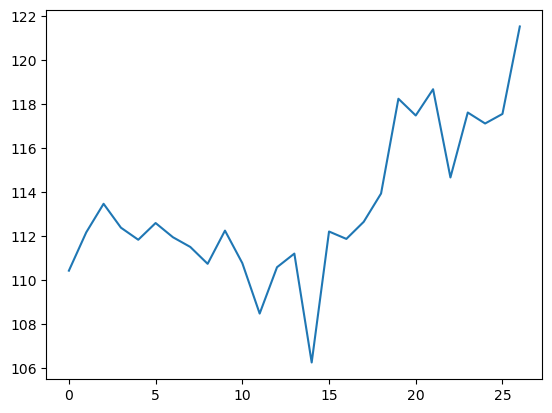

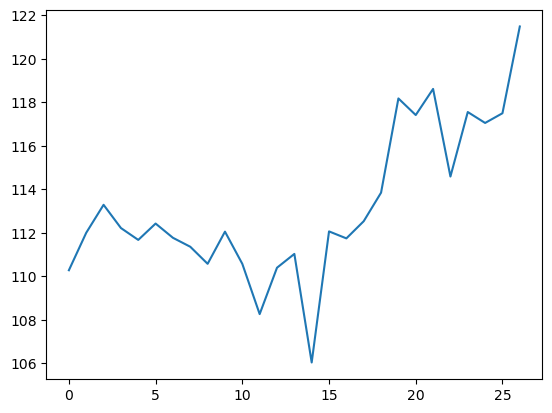

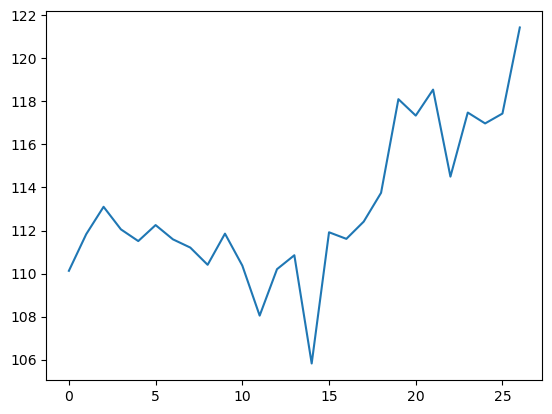

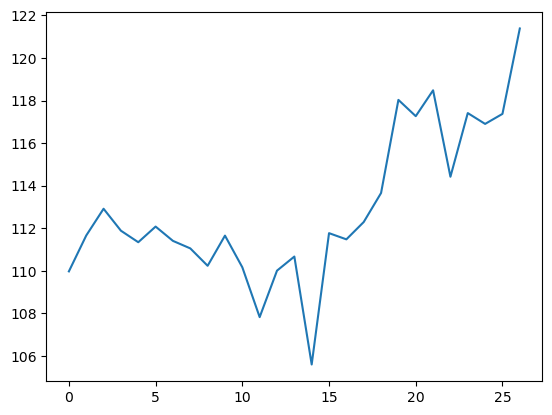

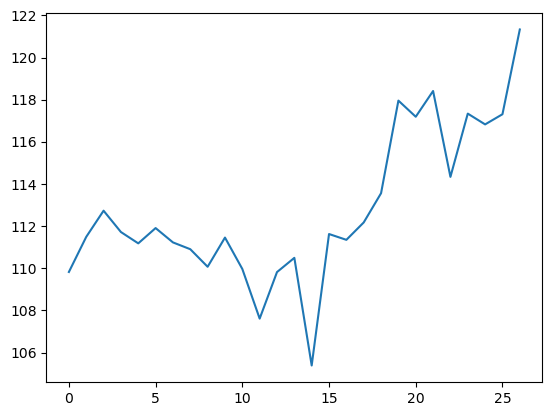

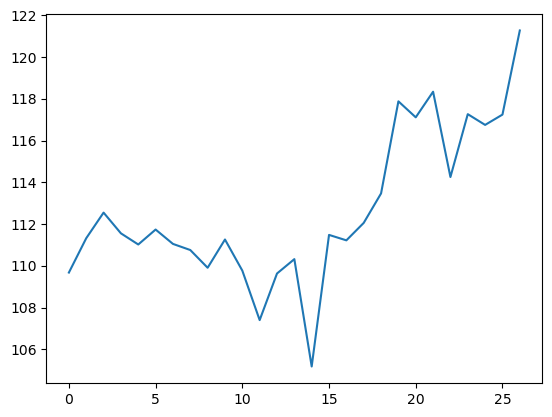

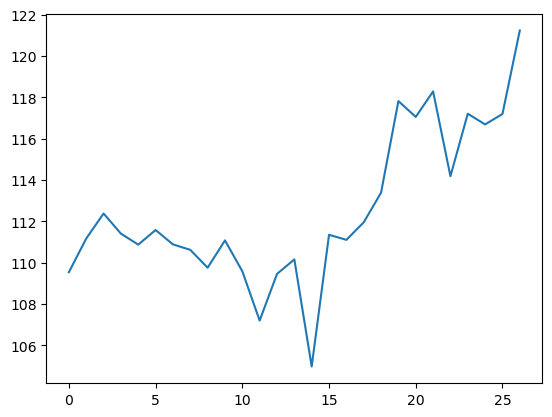

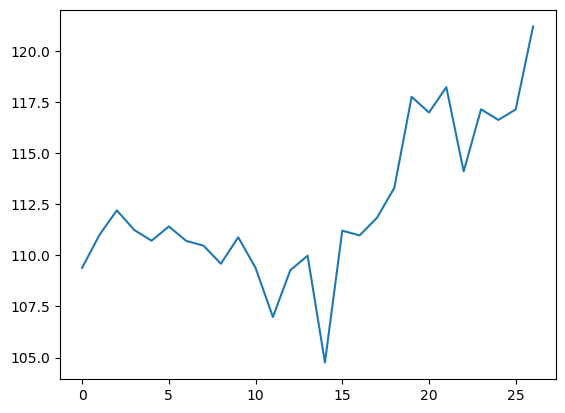

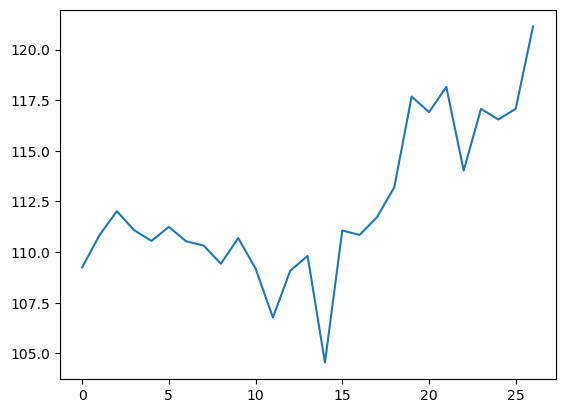

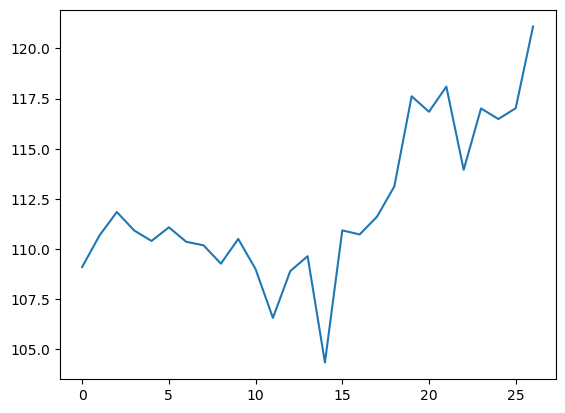

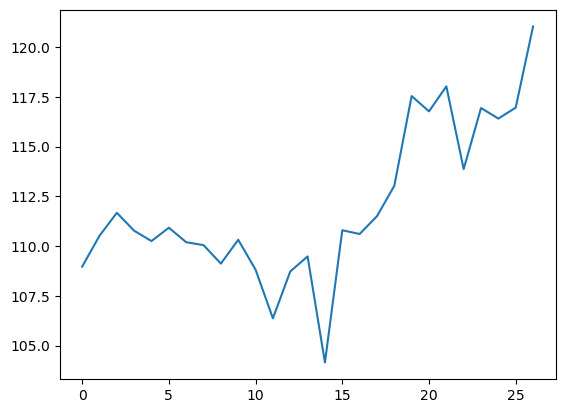

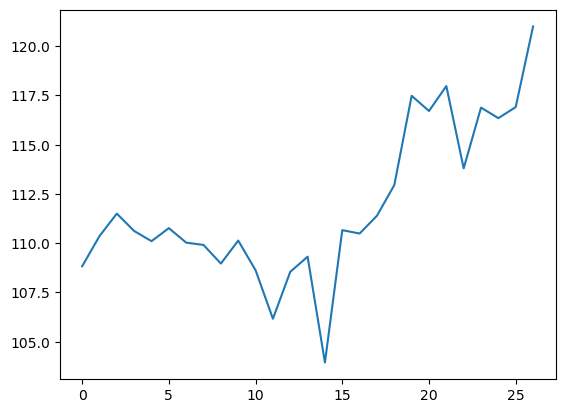

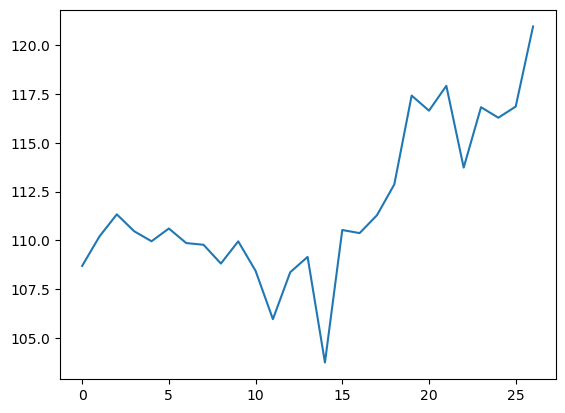

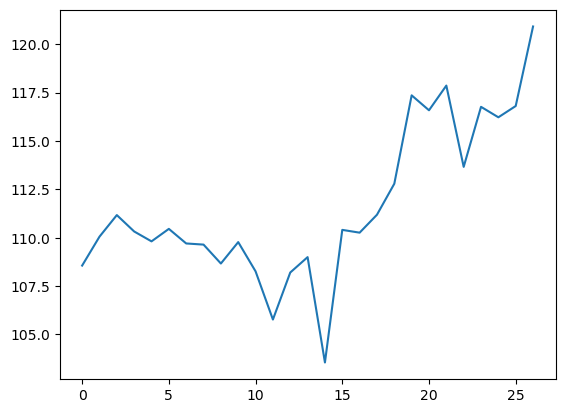

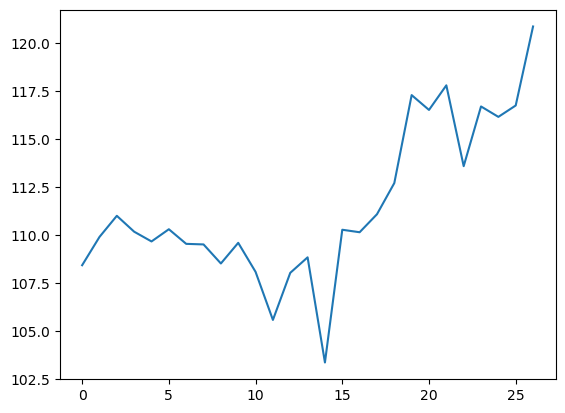

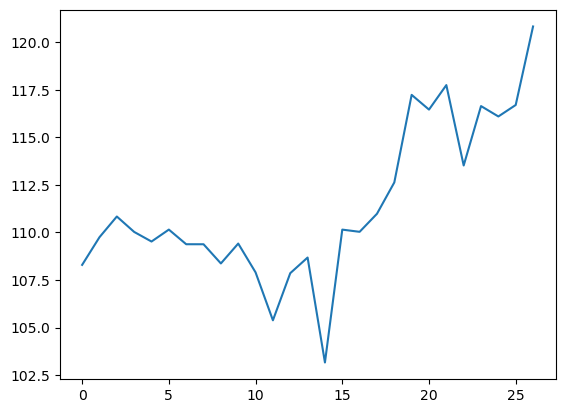

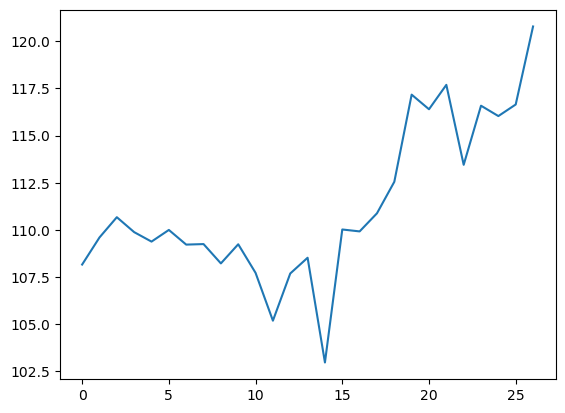

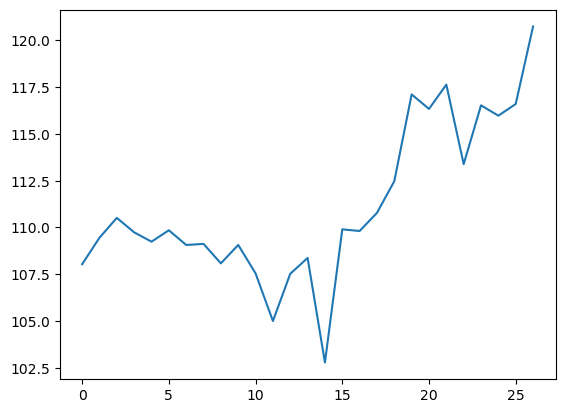

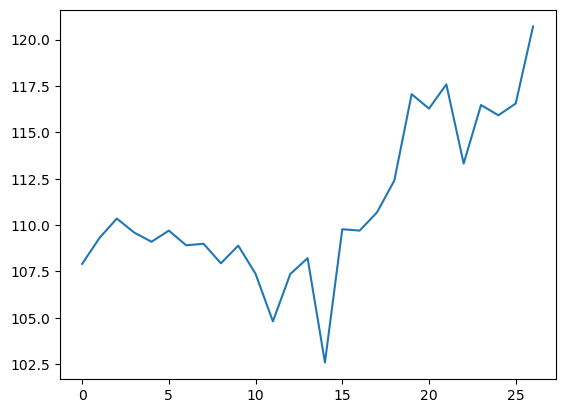

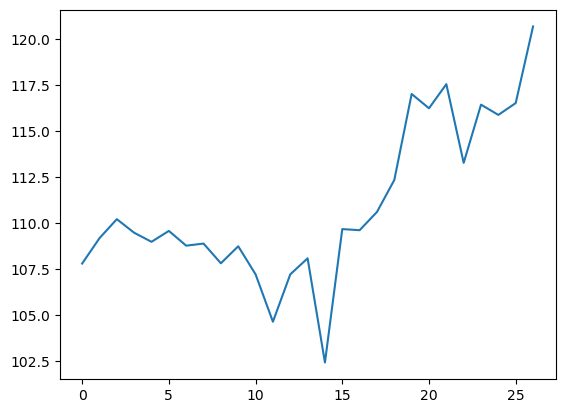

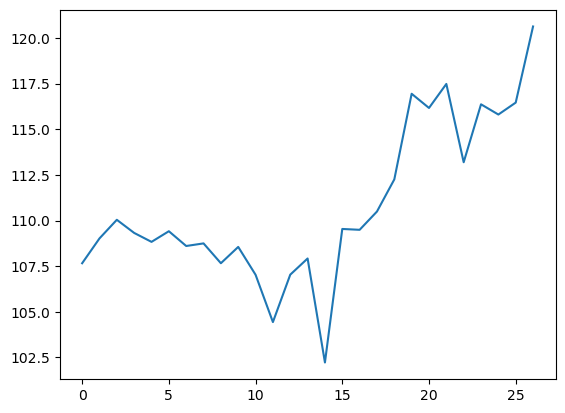

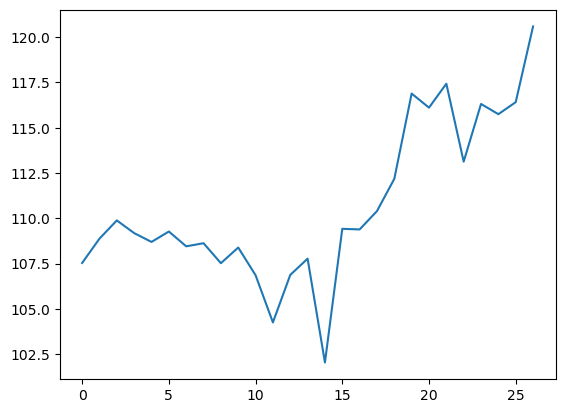

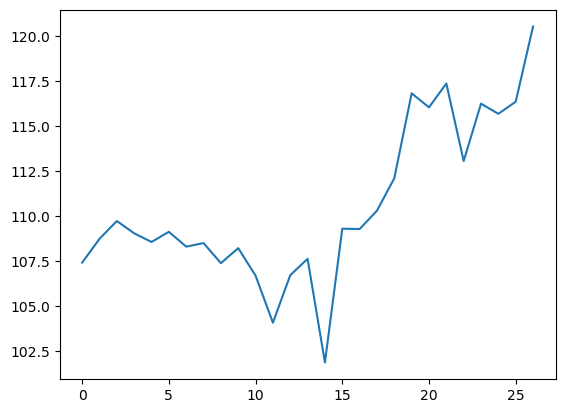

In [49]:
for i in range(200):
    ls = [regression_profile[j][i] for j in range(27)]
    plt.plot(ls)
    plt.show()

In [44]:
def segment_list(input_list, threshold=2):
    segments = []
    curr_segment = [input_list[0]]
    minimum = input_list[0]
    maximum = input_list[0]
    for i in range(1, len(input_list)):
        minimum = min(minimum, input_list[i])
        maximum = max(maximum, input_list[i])
        if abs(input_list[i] - minimum) > threshold or abs(input_list[i] - maximum) > threshold:
            segments.append(curr_segment)
            minimum = input_list[i]
            maximum = input_list[i]
            curr_segment = [input_list[i]]
        else:
            curr_segment.append(input_list[i])
    segments.append(curr_segment)
    return segments

In [45]:
segments = segment_list(ls)
segments

[[203.0, 202.0],
 [205.0, 206.0, 206.0, 205.0, 205.0, 207.0, 206.0, 207.0, 207.0],
 [208.0, 207.0, 206.0, 207.0, 207.0],
 [205.0, 205.0, 206.0, 205.0, 204.0],
 [202.0, 204.0],
 [205.0, 205.0, 204.0],
 [200.0]]

In [46]:
indices = [len(i)-1 for i in segments]
indices

[1, 8, 4, 4, 1, 2, 0]

/var/folders/dy/k0313dz972q9cgnsmg_fypqm0000gn/T/ipykernel_38988/2943054165.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(segments))


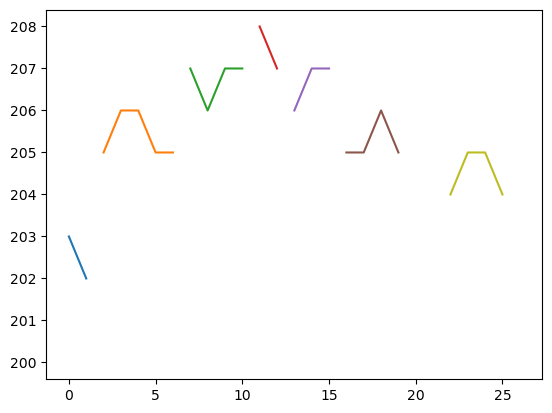

In [39]:
colors = plt.cm.get_cmap('tab10', len(segments))
x_offset = 0
for i, segment in enumerate(segments):
    x_values = range(x_offset, x_offset + len(segment))
    plt.plot(x_values, segment,color=colors(i))
    x_offset += len(segment)
plt.show()


In [11]:
part4 = list(range(9))
random.shuffle(part4)
part5 = list(range(9))
random.shuffle(part5)
part6 = list(range(9))
random.shuffle(part6)

In [11]:
# random.shuffle(regression_profile_part1)
# random.shuffle(regression_profile_part2)
# random.shuffle(regression_profile_part3)

In [12]:
# regression_profile.extend(regression_profile_part1)
# regression_profile.extend(regression_profile_part2)
# regression_profile.extend(regression_profile_part3)

In [12]:
for i in part4:
    regression_profile.append(regression_profile_part1[i])
    regression_params.append(regression_params[:9][i])

In [13]:
for i in part5:
    regression_profile.append(regression_profile_part2[i])
    regression_params.append(regression_params[9:18][i])

In [14]:
for i in part6:
    regression_profile.append(regression_profile_part3[i])
    regression_params.append(regression_params[18:27][i])

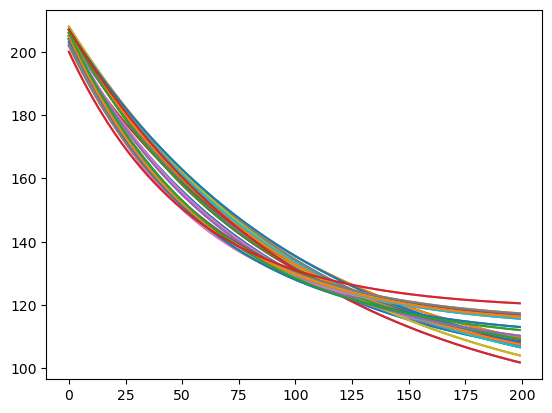

In [17]:
for i, profile in enumerate(regression_profile):
    plt.plot(profile)
plt.show()

In [19]:
# import pickle
# with open('true_data_profile.pkl', 'wb') as file:
#     pickle.dump(regression_profile, file)

In [20]:
# import pickle
# with open('true_data_params.pkl', 'wb') as file:
#     pickle.dump(regression_params, file)